<a href="https://colab.research.google.com/github/PreetiKharb/Telecom-Churn-Prediction/blob/main/TelecomChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries Load data

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter
from math import sqrt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Machine Learning Libraries
import statsmodels.api as sm

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Data Imbalance Treatment Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [2]:
# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# read the data and get idea about it
telecom = pd.read_csv('/content/drive/MyDrive/Data Science/Telecom Churn/telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# Create target variable

Now we need to identify churn customers (churn=1, else 0) based on the fourth month (_9) data. Customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase can be considered as churned customer. The attributes we need to use to tag churners are : 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9
So any customer who does not use any of the facility (calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as Churn (1) else the customer will be tagged as Not Churn (0).

In [8]:
# as mentioned in the problem statement we want do check for usage base churn so we can say if the user hasnt had any incoming, out-going call 
# and did not use 2g or 3g services that most likely the user has churned
telecom['total_usage_9'] = telecom['total_og_mou_9'] + telecom['total_ic_mou_9'] + telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']

In [9]:
# target variable
telecom['churn'] = telecom['total_usage_9'].apply(lambda n: 0 if n>0 else 1)

In [10]:
# Percent churned 
telecom['churn'].value_counts()/telecom.churn.size*100

0    89.808898
1    10.191102
Name: churn, dtype: float64

This is imbalanced as around 90 % of customers are staying. Only 10% are getting churned, but still it is a big issue for companies as the will have to acquire around 5-10 times more customer to balance this loss.

In [11]:
# we can create the columns which are used to create the target variable 9 the month
columns = ['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [12]:
telecom.drop(axis=1, columns=columns, inplace=True)

# Data Cleaning

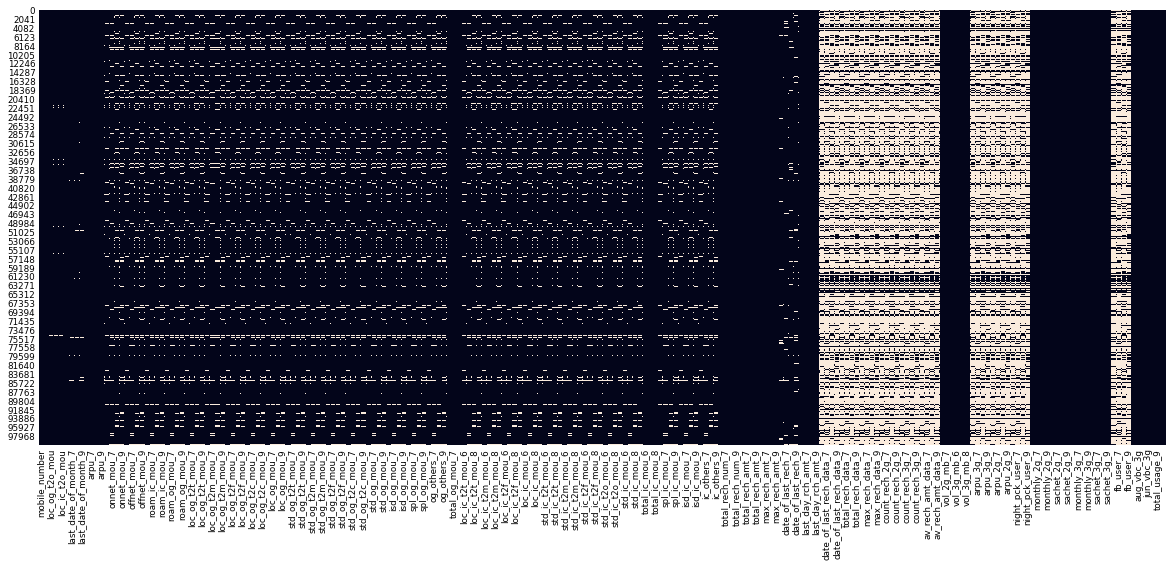

In [13]:
# Plotting the dataframe to check null values and its distribution
plt.figure(figsize = (18,8))
sns.heatmap(telecom.isnull(),cbar = False)
plt.show()

In [14]:
# Function to check column wise null values and % of null values
def null_calc(df):
    #Column wise null values in train data set 
    null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
    null_perc.columns = ['Column Name', 'Null Values Percentage']
    null_value = pd.DataFrame(df.isnull().sum()).reset_index()
    null_value.columns = ['Column Name', 'Null Values']
    null_df = pd.merge(null_value, null_perc, on='Column Name')
    null_df['Null Values Percentage'] = pd.to_numeric(null_df['Null Values Percentage'], errors='coerce')
    null_df = null_df.loc[null_df['Null Values Percentage'] > 0.00] # Keeping only null columns info
    null_df.sort_values("Null Values", ascending = False, inplace=True, ignore_index=True)
    return null_df

In [15]:
# Checking the null values of the telecom dataframe
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,count_rech_2g_6,74846,74.85
1,max_rech_data_6,74846,74.85
2,arpu_3g_6,74846,74.85
3,av_rech_amt_data_6,74846,74.85
4,count_rech_3g_6,74846,74.85
5,night_pck_user_6,74846,74.85
6,arpu_2g_6,74846,74.85
7,fb_user_6,74846,74.85
8,total_rech_data_6,74846,74.85
9,date_of_last_rech_data_6,74846,74.85


### Null value handling

In [16]:
# How many columns have null values ? 
print("Total number of columns which have null values are :", null_telecom.shape[0])

# How many columns have more than 70% null values?
print("Total number of columns which have null values more than 70% :", len(null_telecom[null_telecom['Null Values Percentage']>70]))

Total number of columns which have null values are : 166
Total number of columns which have null values more than 70% : 40


In [17]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of June
if telecom['total_rech_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull()):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


So we see that the two indexes are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.es.

In [18]:
# Imputing the data for total_rech_data_6 and av_rech_amt_data_6 as 0
telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)

In [19]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of July(7)
if telecom['total_rech_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull()):
    print('The indexes for NULL values for month 7 are equal')

# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of August(8)
if telecom['total_rech_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull()):
    print('The indexes for NULL values for month 8 are equal')    

The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


In [20]:
# Imputing the data for total_rech_data_7 and av_rech_amt_data_7 as 0
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)

# Imputing the data for total_rech_data_8 and av_rech_amt_data_8 as 0
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)

In [21]:
# Let's check the missing values again
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_6,74846,74.85
1,night_pck_user_6,74846,74.85
2,arpu_3g_6,74846,74.85
3,count_rech_2g_6,74846,74.85
4,arpu_2g_6,74846,74.85
5,count_rech_3g_6,74846,74.85
6,fb_user_6,74846,74.85
7,date_of_last_rech_data_6,74846,74.85
8,night_pck_user_7,74428,74.43
9,date_of_last_rech_data_7,74428,74.43


Now we will target some of the columns like arpu_3g_X, night_pck_use_Xm, fb_user_X columns for null value imputation. Based on the data description, we can say that if the data is missing, we can consider the customer has not opted for these facilities. We can impute null values as 0 here. But before that we need to verify if our assumption is correct or not. We will check if the missing indices are same for the following variables or not :
- count_rech_2g_X
- count_rech_3g_X
- arpu_2g_X
- arpu_3g_X
- night_pck_user_X
- fb_user_X

In [22]:
# Checking the index matching for month 6
arpu_2g_6_index = telecom['arpu_2g_6'].isnull()
arpu_3g_6_index = telecom['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom['count_rech_3g_6'].isnull()
fb_user_6_index = telecom['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_6_index.equals(arpu_2g_6_index) & arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) & count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


In [23]:
# Checking the index matching for month 7
arpu_2g_7_index = telecom['arpu_2g_7'].isnull()
arpu_3g_7_index = telecom['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom['count_rech_3g_7'].isnull()
fb_user_7_index = telecom['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_7_index.equals(arpu_2g_7_index) & arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) & count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [24]:
# Checking the index matching for month 8
arpu_2g_8_index = telecom['arpu_2g_8'].isnull()
arpu_3g_8_index = telecom['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom['count_rech_3g_8'].isnull()
fb_user_8_index = telecom['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_8_index.equals(arpu_2g_8_index) & arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) & count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


A customer having Mobile internet usage missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.

In [25]:
cols_to_impute = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
for col in cols_to_impute:
    telecom[col].fillna(0, inplace=True)

In [26]:
# Let's check the remaining null value columns
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_6,74846,74.85
1,date_of_last_rech_data_6,74846,74.85
2,max_rech_data_7,74428,74.43
3,date_of_last_rech_data_7,74428,74.43
4,av_rech_amt_data_9,74077,74.08
5,max_rech_data_9,74077,74.08
6,total_rech_data_9,74077,74.08
7,date_of_last_rech_data_9,74077,74.08
8,max_rech_data_8,73660,73.66
9,date_of_last_rech_data_8,73660,73.66


Next, we need to remove the data for the 9th month as they will not be used in prediction purpose as these values are not available for the model. They are only considered to calculate whether customer has churned or not.

In [27]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [28]:
# We will try to get all the columns in the 'tele_highval_cust' dataset where the column have '_9' in the name.

cols_with_9 = [col for col in telecom.columns if '_9' in col]
cols_with_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_usage_9']

In [29]:
# We will be dropping the 9 month data. Let's check how many column data we are about to drop 
print("Number of columns to be dropped : ", len(cols_with_9))

Number of columns to be dropped :  52


In [30]:
#dropping the columns with 9th month data
telecom.drop(cols_with_9,axis = 1, inplace = True)
print("Number of Columns remaining:",len(telecom.columns))

Number of Columns remaining: 172


In [31]:
# How many columns have null values ? 
print("Total number of columns which have null values are :", null_telecom.shape[0])

# How many columns have more than 70% null values?
print("Total number of columns which have null values more than 70% :", len(null_telecom[null_telecom['Null Values Percentage']>70]))

Total number of columns which have null values are : 136
Total number of columns which have null values more than 70% : 10


We have treated 29 columns with high null values(>70%) till now.

In [32]:
telecom[['arpu_6', 'arpu_7', 'arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731
std,328.439770,338.156291,344.474791
min,-2258.709000,-2014.045000,-945.808000
25%,93.411500,86.980500,84.126000
50%,197.704000,191.640000,192.080000
75%,371.060000,365.344500,369.370500
max,27731.088000,35145.834000,33543.624000


The above statistical description of the ARPU - Average Revenue Per User column gives some important insight. The MINIMUM value for all the arpu related columns are NEGATIVE. Now as per the definition of ARPU which says -

"The average revenue per user is the average billing per customer earned by the telecom company every month".

Now the revenue generated from a user cannot be negative. If a customer is not using any services then arpu for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [33]:
# Total number of such observations for month 6,7,8
print('Total observations with negative arpu values for month 6 :' , len(telecom[telecom['arpu_6']<0]))
print('Total observations with negative arpu values for month 7 :' , len(telecom[telecom['arpu_7']<0]))
print('Total observations with negative arpu values for month 8 :' , len(telecom[telecom['arpu_8']<0]))

Total observations with negative arpu values for month 6 : 416
Total observations with negative arpu values for month 7 : 498
Total observations with negative arpu values for month 8 : 508


In [34]:
# Let's delete the rows where arpu_X with negative values

telecom = telecom[(telecom['arpu_6'] >= 0) & 
                  (telecom['arpu_7'] >= 0) & 
                  (telecom['arpu_8'] >= 0)]
telecom.shape

(98587, 172)

In [35]:
telecom[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,98587.000000,98587.000000,98587.000000
mean,284.728782,281.084361,281.282791
std,328.702612,338.672390,344.949429
min,0.000000,0.000000,0.000000
25%,94.556000,88.683500,85.905500
50%,199.200000,194.041000,194.232000
75%,372.856500,368.132000,371.490000
max,27731.088000,35145.834000,33543.624000


We have deleted 1412 rows of data which 1.4% of overall data. This will not impact much on our analysis. Now let's try to identify high value customers next. e

## High Value **Customer**

Now we have values for 'total_rechdata' and 'av_rech_amtdata' (for months 6, 7, 8 & 9). Using these 2 values, we can derive new features for the respective months called total_data_rech_amt which equals total_rechdata * av_rech_amtdata
Also this new feature would help us in computing the total data recharge amount : 'total_data_rech_amt' for the months 6, 7, 8 & 9.

In [36]:
# calculating total_data_rech_amt
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months which are the good phases.

In [37]:
# Lets compute the average recharge amount for the month 6 & 7. 
#This total amount is equal to the sum of talk time recharge and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  240.75


In [38]:
# Filtering the high value customers

tele_highval_cust = telecom[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

# resetting the index
tele_highval_cust = tele_highval_cust.reset_index(drop=True)

tele_highval_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,252.0,252.0,252.0
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.9

In [39]:
# high value customer Dataframe dimension
print("Dataframe dimension     :",tele_highval_cust.shape)
print("Dataframe size          :",tele_highval_cust.size)
print("Number of Row          :",len(tele_highval_cust.index))
print("Number of Columns      :",len(tele_highval_cust.columns))

Dataframe dimension     : (29591, 175)
Dataframe size          : 5178425
Number of Row          : 29591
Number of Columns      : 175


## Null Imputation for High Value Customer Data Frame

In [40]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_8,13740,46.43
1,date_of_last_rech_data_8,13740,46.43
2,max_rech_data_6,12977,43.85
3,date_of_last_rech_data_6,12977,43.85
4,max_rech_data_7,12670,42.82
5,date_of_last_rech_data_7,12670,42.82
6,loc_ic_t2f_mou_8,1088,3.68
7,std_ic_t2m_mou_8,1088,3.68
8,loc_og_t2c_mou_8,1088,3.68
9,std_ic_t2t_mou_8,1088,3.68


There are 6 columns which have high null values. To impute data for these columns, we need to review each column individually and understand the data. First we will review 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' columns. These are date columns and it is not possible to impute the null values, thus we will drop the columns.

In [41]:
#dropping the date_of_last_rech_data_X columns
tele_highval_cust.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis = 1, inplace = True)
print("Number of Columns remaining:",len(tele_highval_cust.columns))

Number of Columns remaining: 172


Next we will review 'max_rech_data_6', 'max_rech_data_7' & 'max_rech_dat

In [42]:
# checking the data distribution of these 3 columns : 
tele_highval_cust[['max_rech_data_6', 'max_rech_data_7' , 'max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16614.000000,16921.000000,15851.000000
mean,139.744192,140.500561,136.448300
std,118.743427,120.291309,119.687372
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


In [43]:
# How many rows are null ?
print ("Total NULL values for max_rech_data_6 column : ",tele_highval_cust.max_rech_data_6.isnull().sum())
print ("Total NULL values for max_rech_data_7 column : ",tele_highval_cust.max_rech_data_7.isnull().sum())
print ("Total NULL values for max_rech_data_8 column : ",tele_highval_cust.max_rech_data_8.isnull().sum())

Total NULL values for max_rech_data_6 column :  12977
Total NULL values for max_rech_data_7 column :  12670
Total NULL values for max_rech_data_8 column :  13740


From the above analysis, we can see the maximum recharge value is 1555 and minimum recharge value is 1. We can consider that null value means the customer has not recharged that month. We will impute 0 for the null values for these three columns.

In [44]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    tele_highval_cust[col].fillna(0, inplace=True)

In [45]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,loc_og_t2m_mou_8,1088,3.68
1,std_ic_t2m_mou_8,1088,3.68
2,std_ic_t2t_mou_8,1088,3.68
3,std_og_mou_8,1088,3.68
4,loc_ic_mou_8,1088,3.68
5,loc_og_t2f_mou_8,1088,3.68
6,loc_ic_t2f_mou_8,1088,3.68
7,loc_og_t2c_mou_8,1088,3.68
8,loc_ic_t2m_mou_8,1088,3.68
9,loc_og_mou_8,1088,3.68


There are three date columns date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8.#It is not possible to impute these data. We will drop these columns as it will not be useful for prediction. Also another 3 date columns of last_date_of_month_X has same value in all row. These are not useful so we will drop them.

In [46]:
# Delete all the date columns
tele_highval_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                        'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis = 1, inplace = True)
tele_highval_cust.shape

(29591, 166)

We have successfully imputed high null value columns. For the remaining 95 columns with null values, they contain MOU - Minutes of usage - voice call data. Now, a null value in these columns can be considered as 0, meaning the customer has not utilized these facilities.

If we look into the columns properly, we can notice that the MOU null values for month 8th is significantly more than month 6th and 7th (almost doubled). This may signify that the customers are now starting to leave the telecom company.

In [47]:
# Let's store the null columns as a list first
cols_null = tele_highval_cust.columns[tele_highval_cust.isna().any()].tolist()
print(cols_null)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_m

In [48]:
# Let's impute these data with 0

for col in cols_null:
    tele_highval_cust[col].fillna(0, inplace=True)   

In [49]:
# Now let't check if there are any columns which have null values
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage


In [50]:
# Let's check what is our dataframe size currently
tele_highval_cust.shape

(29591, 166)

We have successfully imputed all the null values in all the columns. Next let's analyze columns which have only 1 value or 0 variance. We can drop these columns as they will not have any predictive power

## Delete Unnecessary Columns

In [51]:
#Variance 
columns_with_0_variance = tele_highval_cust.var() == 0
print("Total columns with ZERO variance are : ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

Total columns with ZERO variance are :  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [52]:
# We will drop these columns where variance is 0
tele_highval_cust.drop(column_name_with_0_variance,axis=1, inplace = True)
tele_highval_cust.shape

(29591, 156)

Looking at the problem statement, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity. We will also delete the mobile_number column as it will not be needed for prediction purpose.

In [53]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'mobile_number']

tele_highval_cust.drop(individual_cols, axis = 1, inplace = True)

tele_highval_cust.shape

(29591, 104)

## Categorical Columns Conversion

Some of the columns have binary data - 0/1. We need to identify them and convert them as Ordered Categorical Column.

In [54]:
# Checking the unique values in the dataframe
#funtion for creation a dataframe to record the columns, their unique values and unique value counts

def frequency_info(df):
    df_result = pd.DataFrame(columns=["columns","values","unique_values"])
    
    df_temp=pd.DataFrame()
    for value in df.columns:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("unique_values", ascending =True, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [55]:
# Let's check the unique values to identify which can be categorical columns
frequency_info(tele_highval_cust)

,values,unique_values
columns,,
night_pck_user_8,"[0.0, 1.0]",2
churn,"[1, 0]",2
fb_user_8,"[1.0, 0.0]",2
fb_user_7,"[1.0, 0.0]",2
fb_user_6,"[1.0, 0.0]",2
night_pck_user_6,"[0.0, 1.0]",2
night_pck_user_7,"[0.0, 1.0]",2
monthly_2g_6,"[0, 2, 1, 3, 4]",5
monthly_2g_8,"[0, 1, 2, 5, 3, 4]",6


In [56]:
# We will convert the columns which have 2 values to an ordered categorical column and convert it to int type
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tele_highval_cust[category_list] = tele_highval_cust[category_list].astype(int)

tele_highval_cust[category_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29591 non-null  int64
 1   night_pck_user_7  29591 non-null  int64
 2   night_pck_user_8  29591 non-null  int64
 3   fb_user_6         29591 non-null  int64
 4   fb_user_7         29591 non-null  int64
 5   fb_user_8         29591 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


We have successfully deleted unnecessary columns. Now, we can proceed to do exploratory data analysis.

# EDA

First we will segregate categorical and numerical columns. The categorical columns in this data frames are ordinal categorical columns. We will convert all these columns to integer type.

In [57]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 
            'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
num_cols = tele_highval_cust.dtypes[(tele_highval_cust.dtypes == "float64") | (tele_highval_cust.dtypes == "int64") | (tele_highval_cust.dtypes == "int32")].index.to_list()
for col in cat_cols:
    num_cols.remove(col) 
num_cols.remove('churn')

In [58]:
print("CATEGORICAL FEATURES : \n {} \n\n".format(cat_cols))
print("NUMERICAL FEATURES : \n {} \n\n".format(num_cols))

CATEGORICAL FEATURES : 
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'] 


NUMERICAL FEATURES : 
 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_

## Imbalance Analysis

We need to check the imbalance in Customer Churn Data. If the data is highly imbalanced, we need to use proper methods to negate the effect of imbalance in our prediction models.

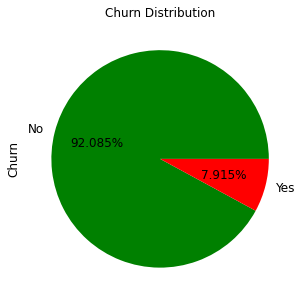

In [59]:
# Checking the customer churn distribution
ax = (tele_highval_cust['churn'].value_counts()*100.0 /len(tele_highval_cust)).plot.pie(autopct='%.3f%%', 
        labels = ['No', 'Yes'],
        colors =['g','r'],
        figsize =(5,5), 
        fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

## Categorical Data Analysis

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

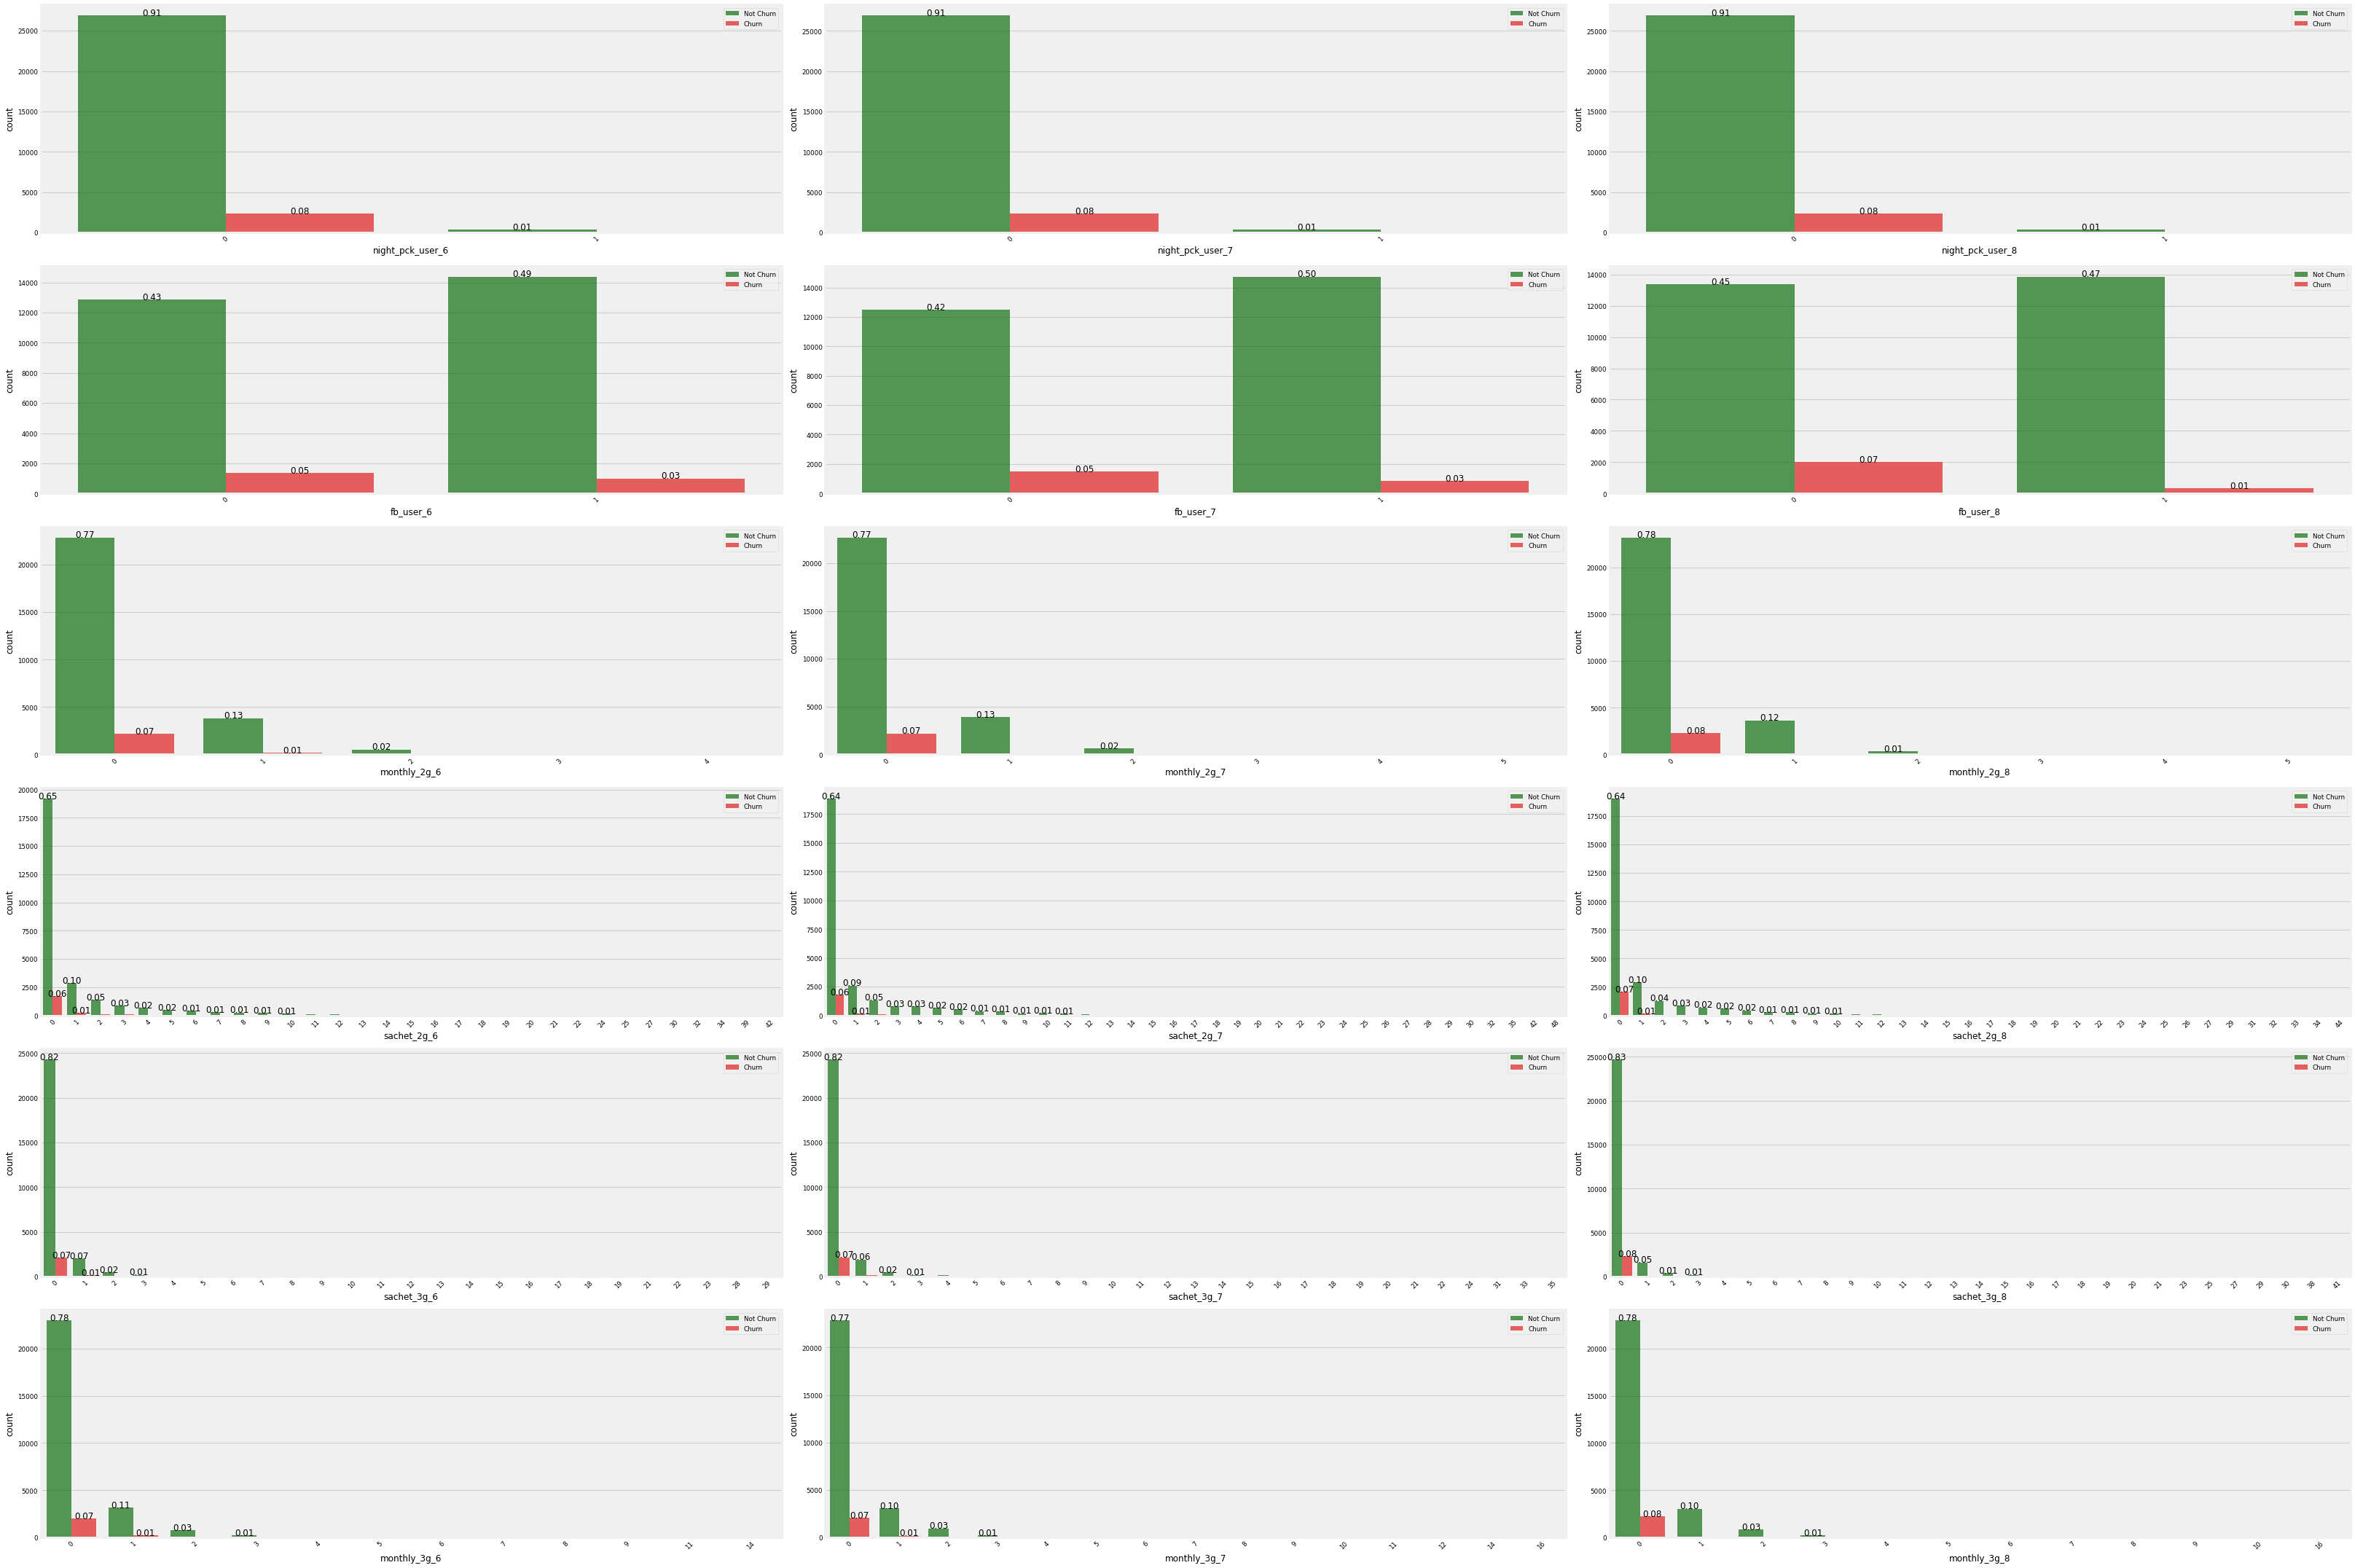

In [60]:
#Plotting a countplot with all the variables
fig, axes = plt.subplots(round(len(cat_cols) / 3), 3, figsize=(45, 30))

total = float(len(tele_highval_cust))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_cols[i], alpha=0.7, data=tele_highval_cust, hue=tele_highval_cust['churn'],palette=['g','r'], ax=ax)
        # Renaming the Legends from 0/1 to Not Churn/Churn
        ax.legend(['Not Churn','Churn'],loc="upper right")
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(cat_cols[i],fontsize=12)
        ax.set_ylabel('count',fontsize=12)
        # adding annotations
        for p in ax.patches:
            height = p.get_height()
            tick_val = '{:1.2f}'.format(height/total)
            if tick_val== '0.00':
              tick_val=''
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    tick_val,
                    ha="center",
                    fontsize=12)
        
fig.tight_layout()

- From the night_pck_user variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.
- Similarly from the fb user variables, it can be inferred that almost 52 % of users are not using FB in all the 3 months.
- 82% of the users have no monthly_2g and monthly_3g packs in all the 3 months. Customers who have opted for the 1 month plan have almost not churned out, which is a good indicator. Also this count is decreasing across the months.
- Around 70% of the Users have not opted for sachet_2g and sachet_3g packs across the months and this trend is also observed to be decreasing and these users have churned out a lot compared to the users who use these sachet packs.

## Numerical Data Analysis

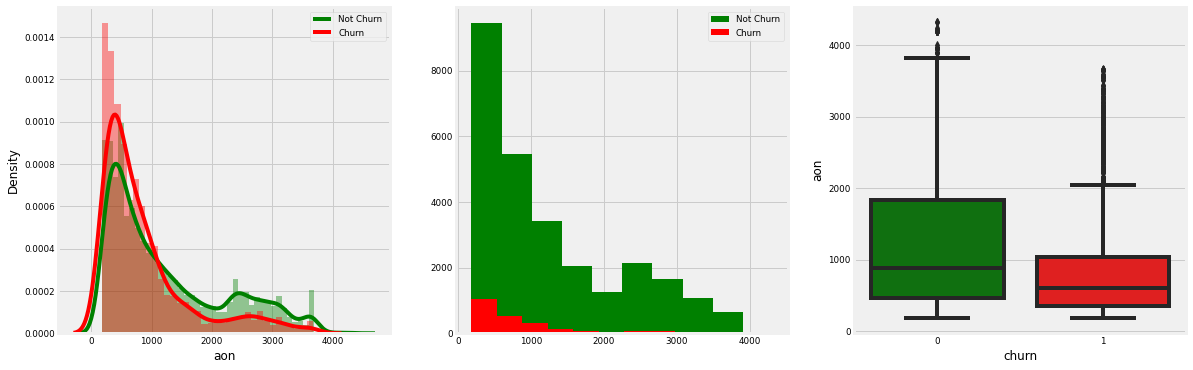

In [61]:
# Data Distribution
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.distplot(tele_highval_cust.loc[tele_highval_cust['churn']==0,'aon'],hist=True, color = 'g')
sns.distplot(tele_highval_cust.loc[tele_highval_cust['churn']==1,'aon'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,2)
plt.hist(tele_highval_cust.loc[tele_highval_cust['churn']==0,'aon'],color = 'g')
plt.hist(tele_highval_cust.loc[tele_highval_cust['churn']==1,'aon'],color = 'r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,3)
sns.boxplot(y='aon', data=tele_highval_cust, x='churn',palette =['g','r'])

plt.show()

This plot shows that as the user has been with the network for more period, chances of churn is less and this could be focussed as one of the parameters to retain the customers. Lets check the other numerical data distribution. This is also shown in the boxplot where 25th to 75th percentile of churn customers have lower value than non-churn customers.

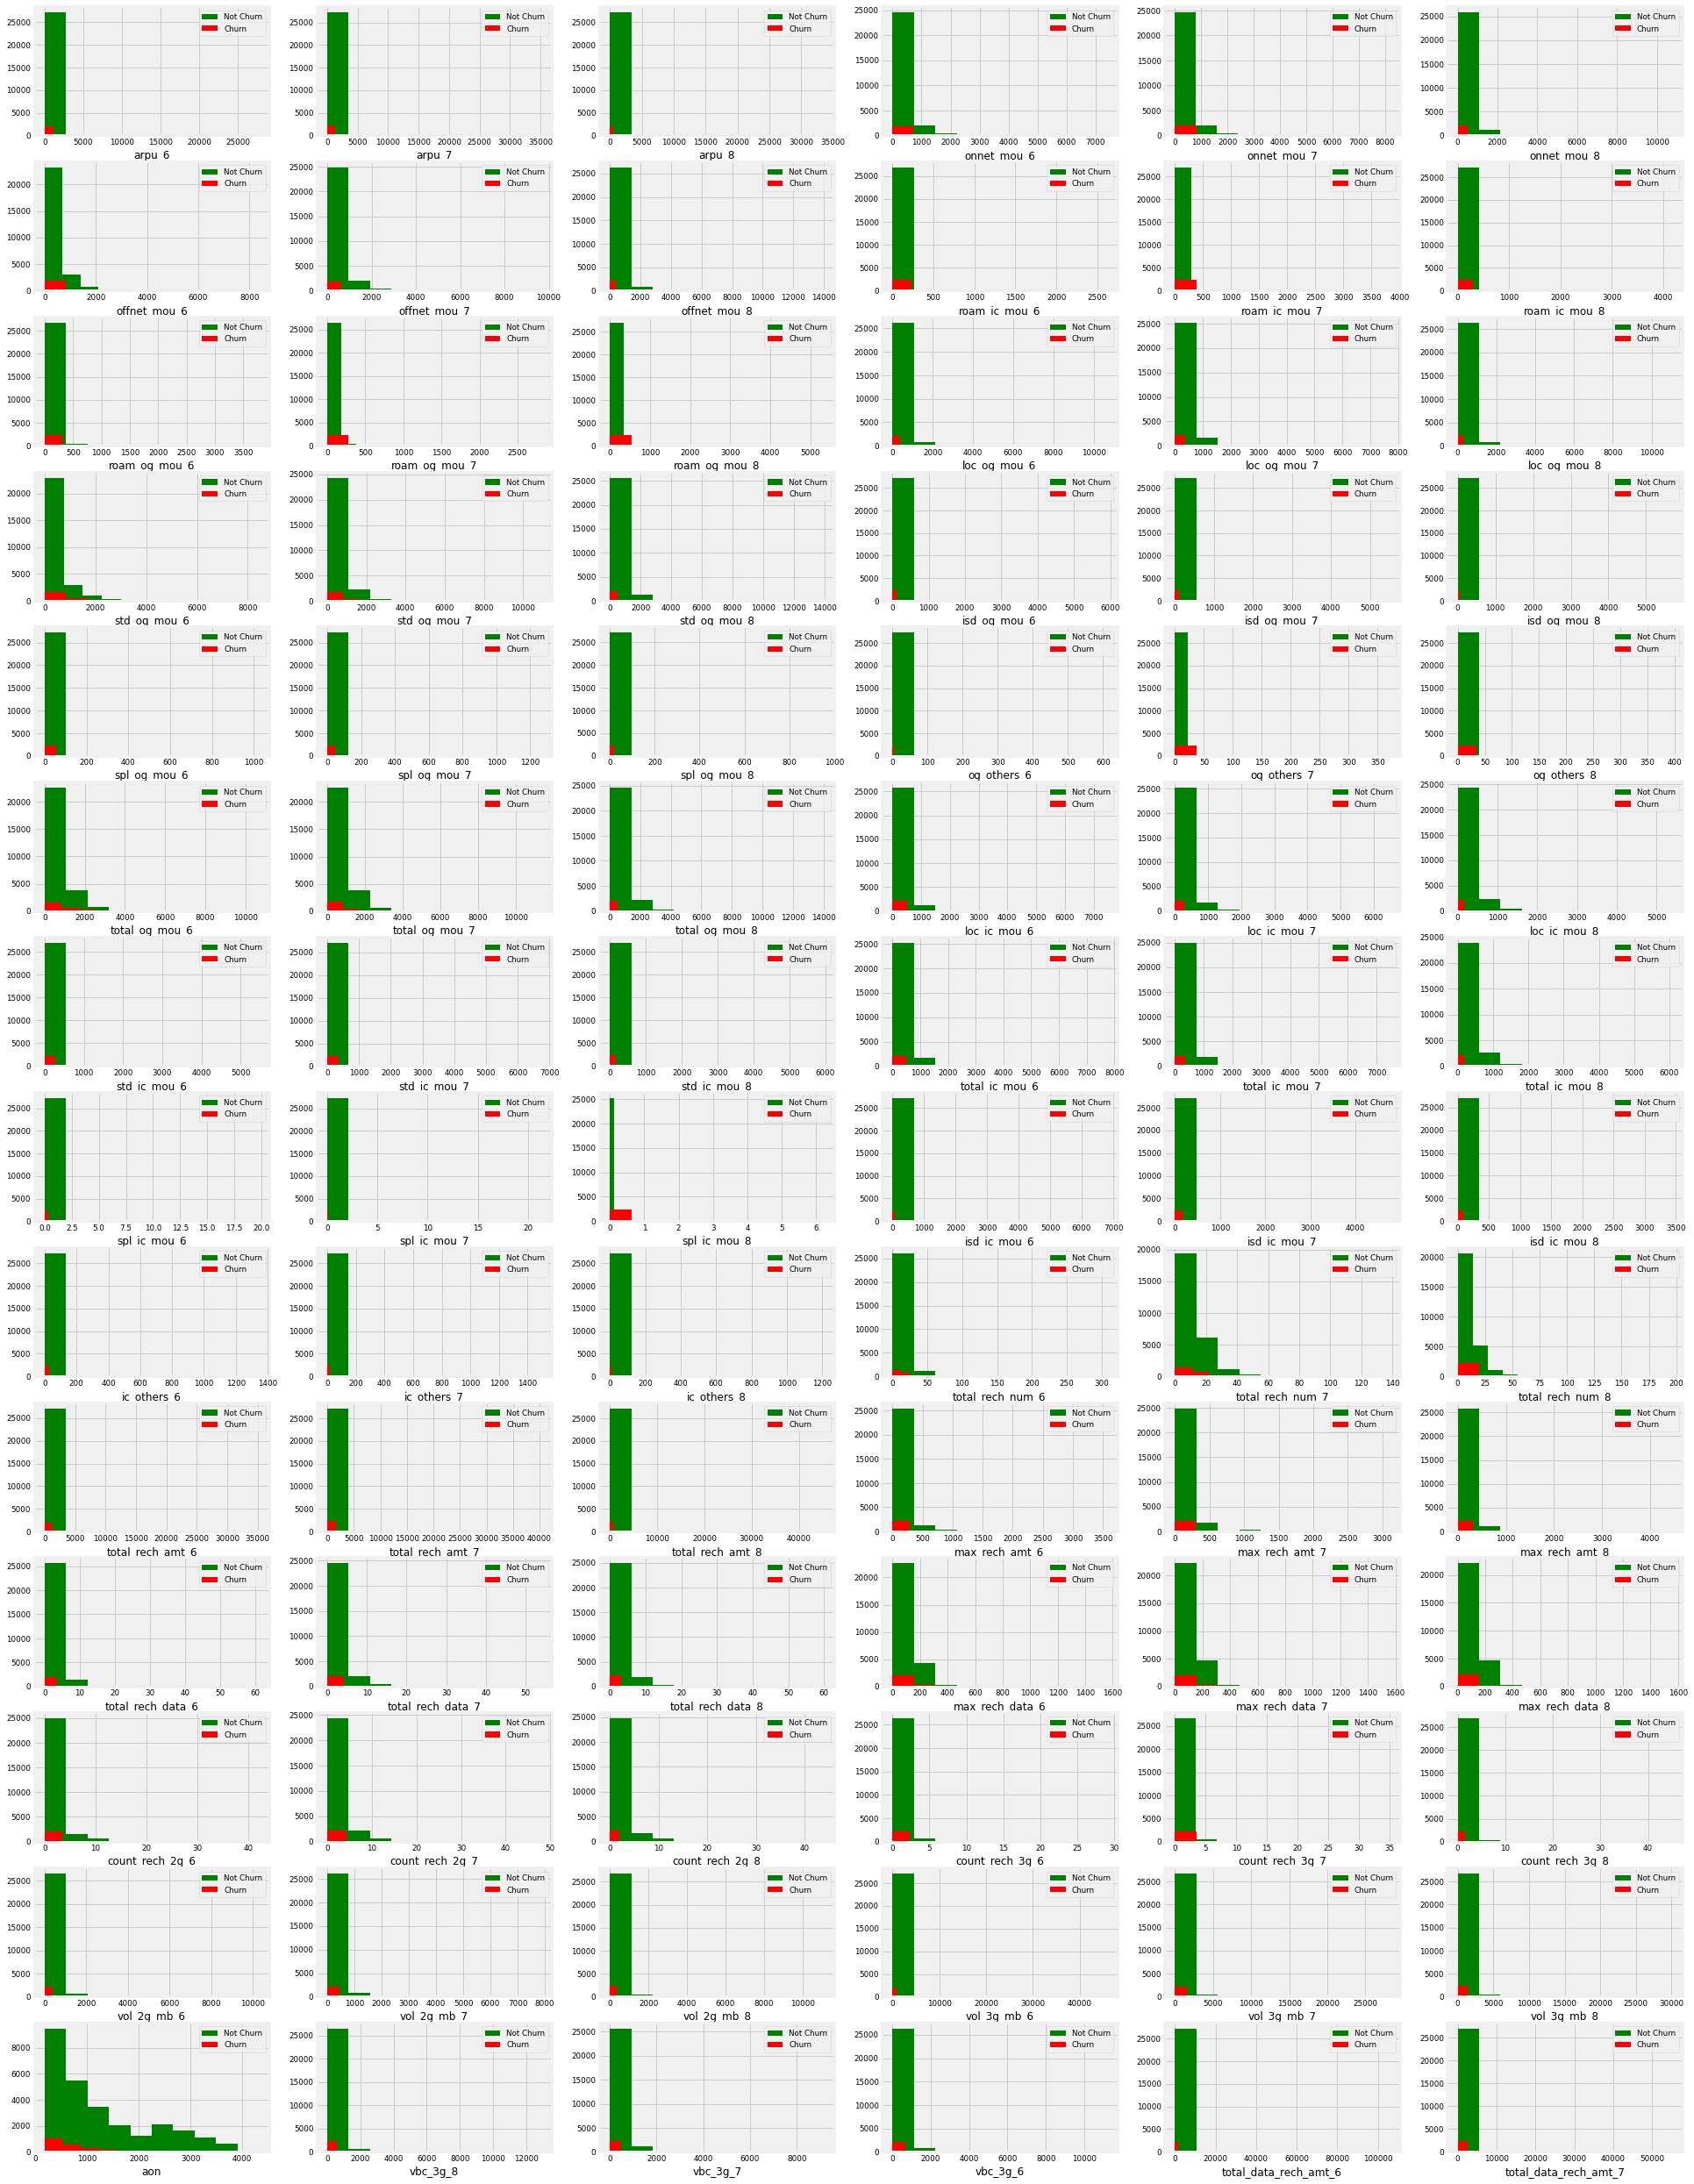

In [62]:
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(30, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.hist(tele_highval_cust.loc[tele_highval_cust['churn']==0, num_cols[i]],color='g')
        ax.hist(tele_highval_cust.loc[tele_highval_cust['churn']==1, num_cols[i]],color='r')
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(num_cols[i],fontsize=12)
        ax.legend(['Not Churn','Churn'],loc = 'best')        
plt.show()

- arpu: People who have churned out seem to have average revenue per user as zero in all the 3 months.
- ONNET: All kind of calls within the same operator network - minutes of voice calls Calls within same operator is very less for churned customers
- OFFNET: All kind of calls outside the operator T network - minutes of voice calls This seems to be higher than ONNET calls.
- Roaming incoming and outgoing calls have been higher indicating that the customers could have churned due to the location change. Similarly local incoming and outgoing calls are less.
- Special incoming calls is high in the 8th month for the churned customers.
total_rech_amt is getting less with each month.
- 3g usage has been increasing among churned customers, hence increasing better 3g connectivity might help to reduce the churn
- Data is not normally distributed

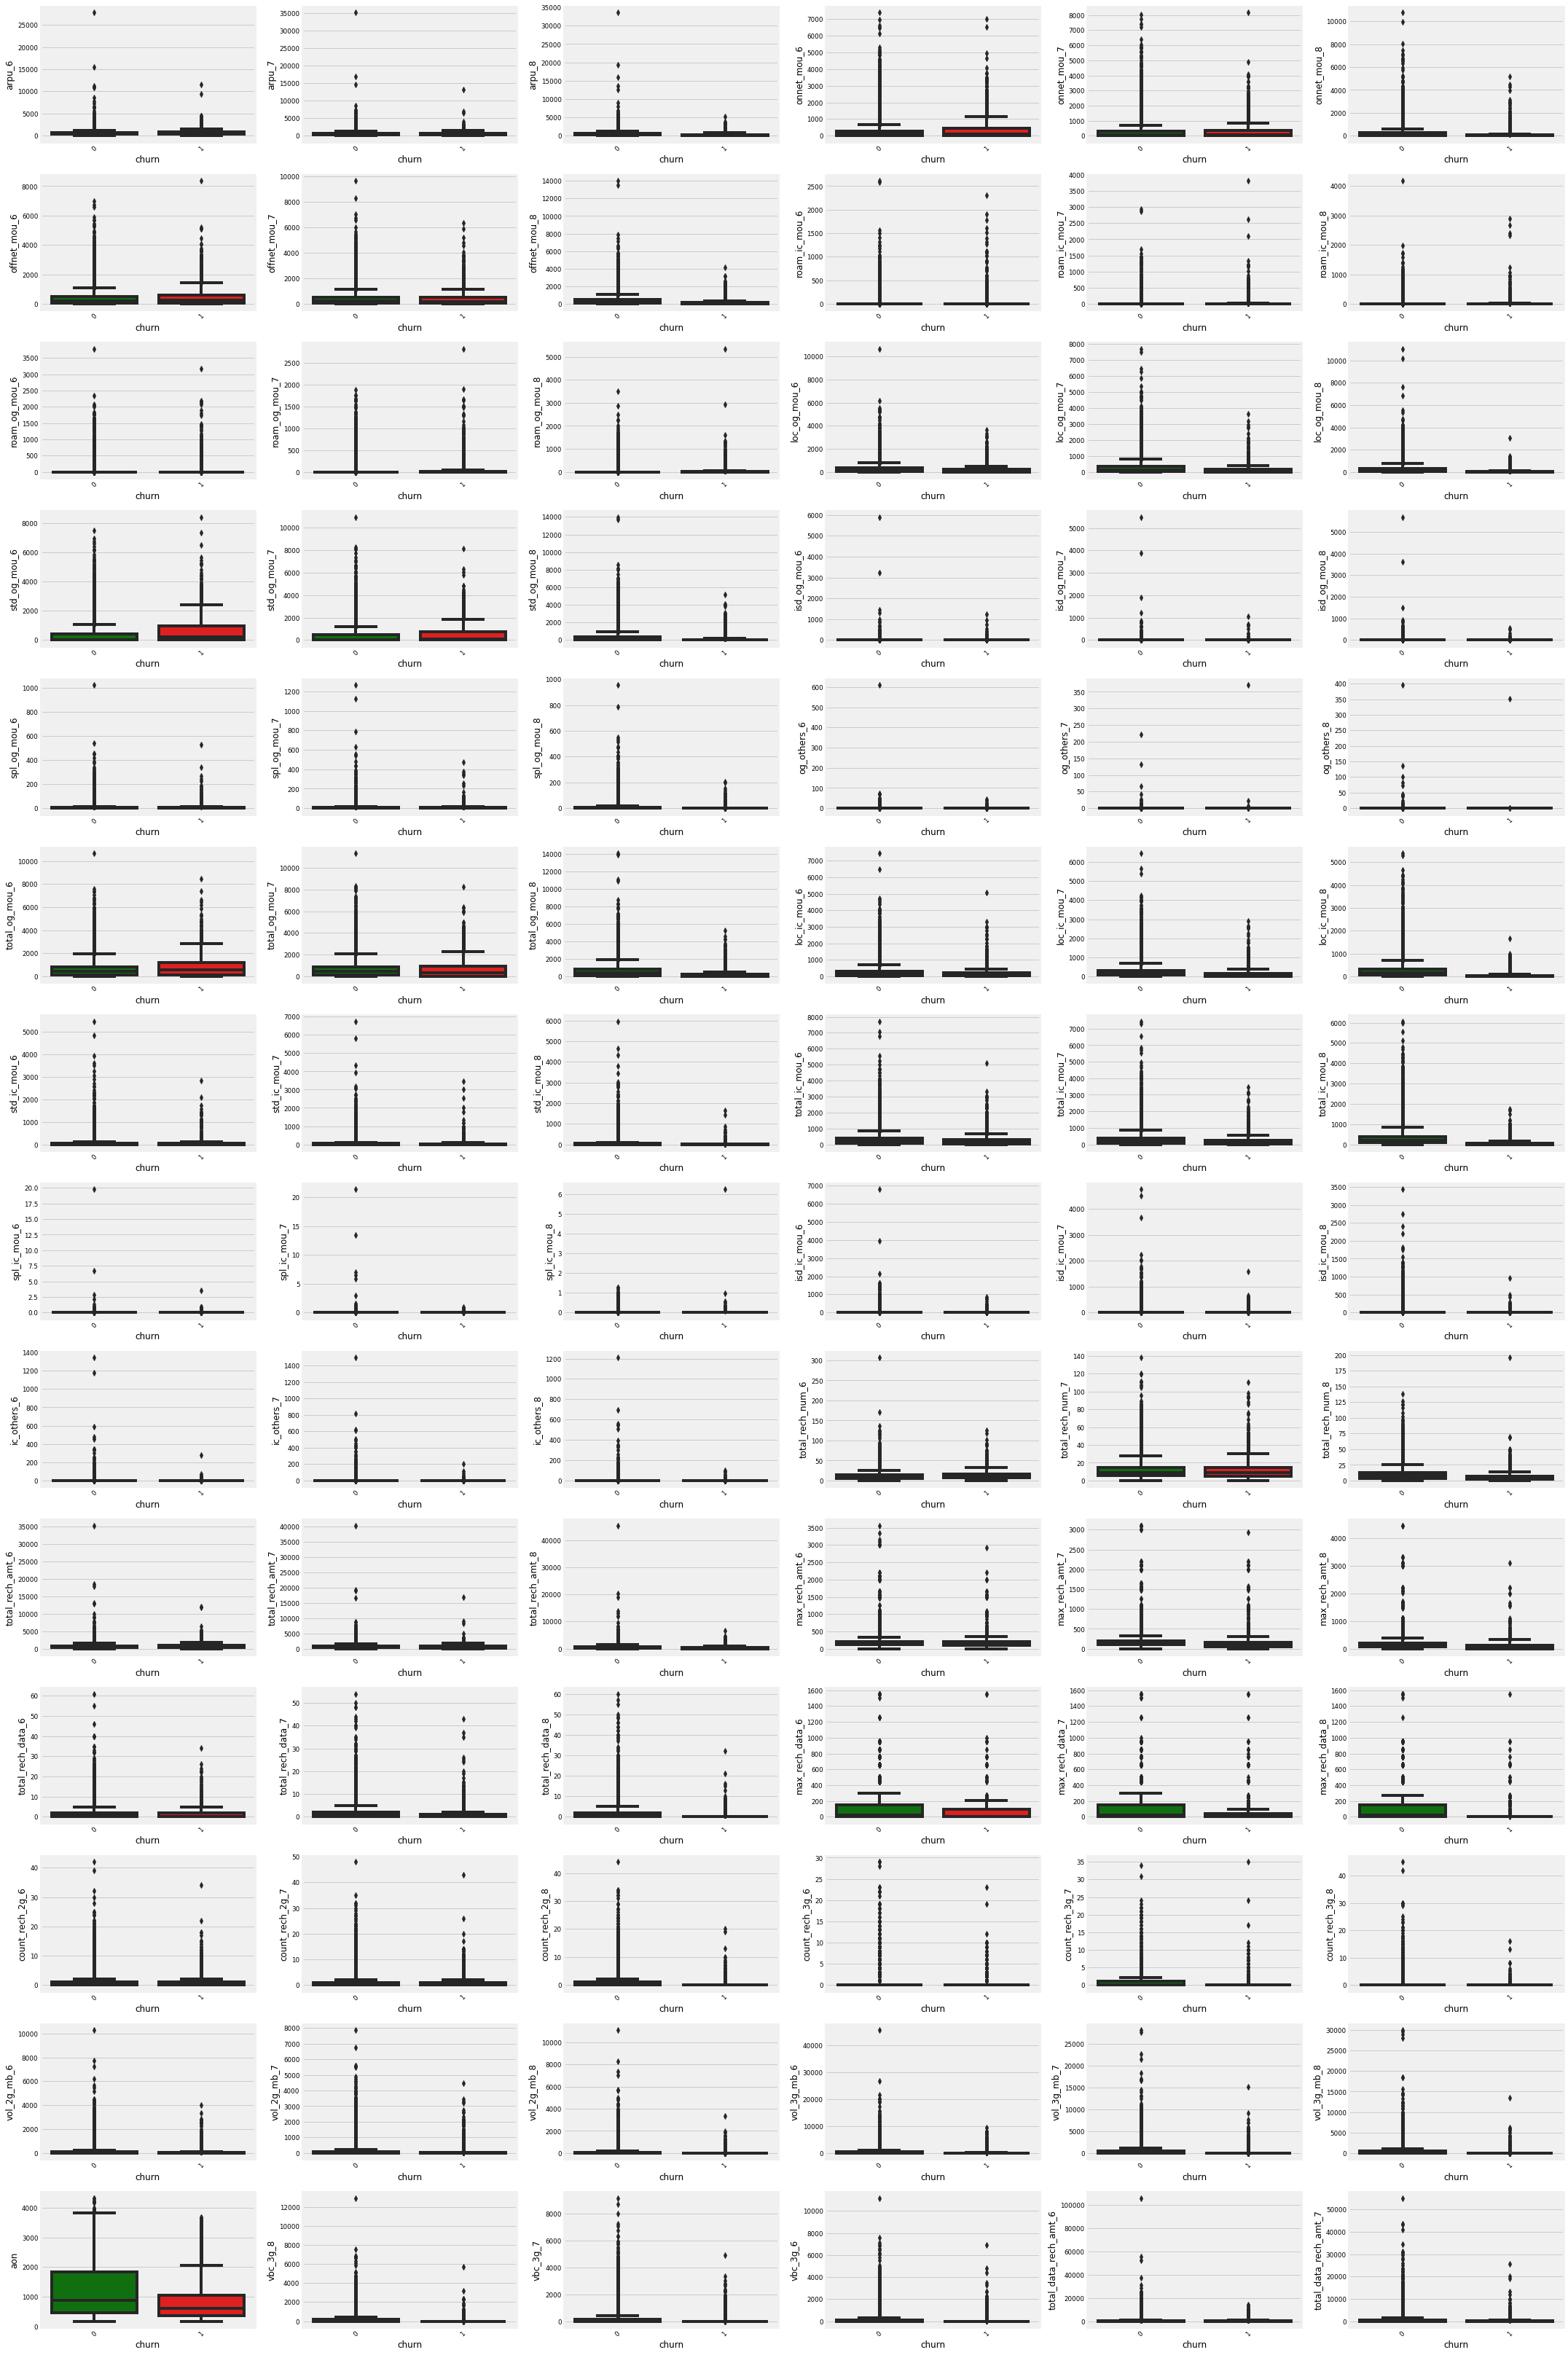

In [63]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(30, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

- Most of the columns have outliers.
- The data is not normally distributed.
- The variance is very high among the columns. We can apply boxcox transformation
- roam_ic_mou variables have higher value for churned customers than the non-churned customers indicating customers who travel or move to other places and receive more calls tend to churn out. std_og_mou variables also follow this pattern.
- roam_og_mou variables do not follow this pattern indicating customers who travel and make the calls stay active in the network.
- total_og variables indicate there is a steady decrease in the outgoing calls made by the churned customers.
- spl_ic variables show that there has been a decrease in the special incoming calls in the 8th month which might have played a role for churn.
- count_rech_2g and count_rech_3g variables show that there is a decrease during the 8th month

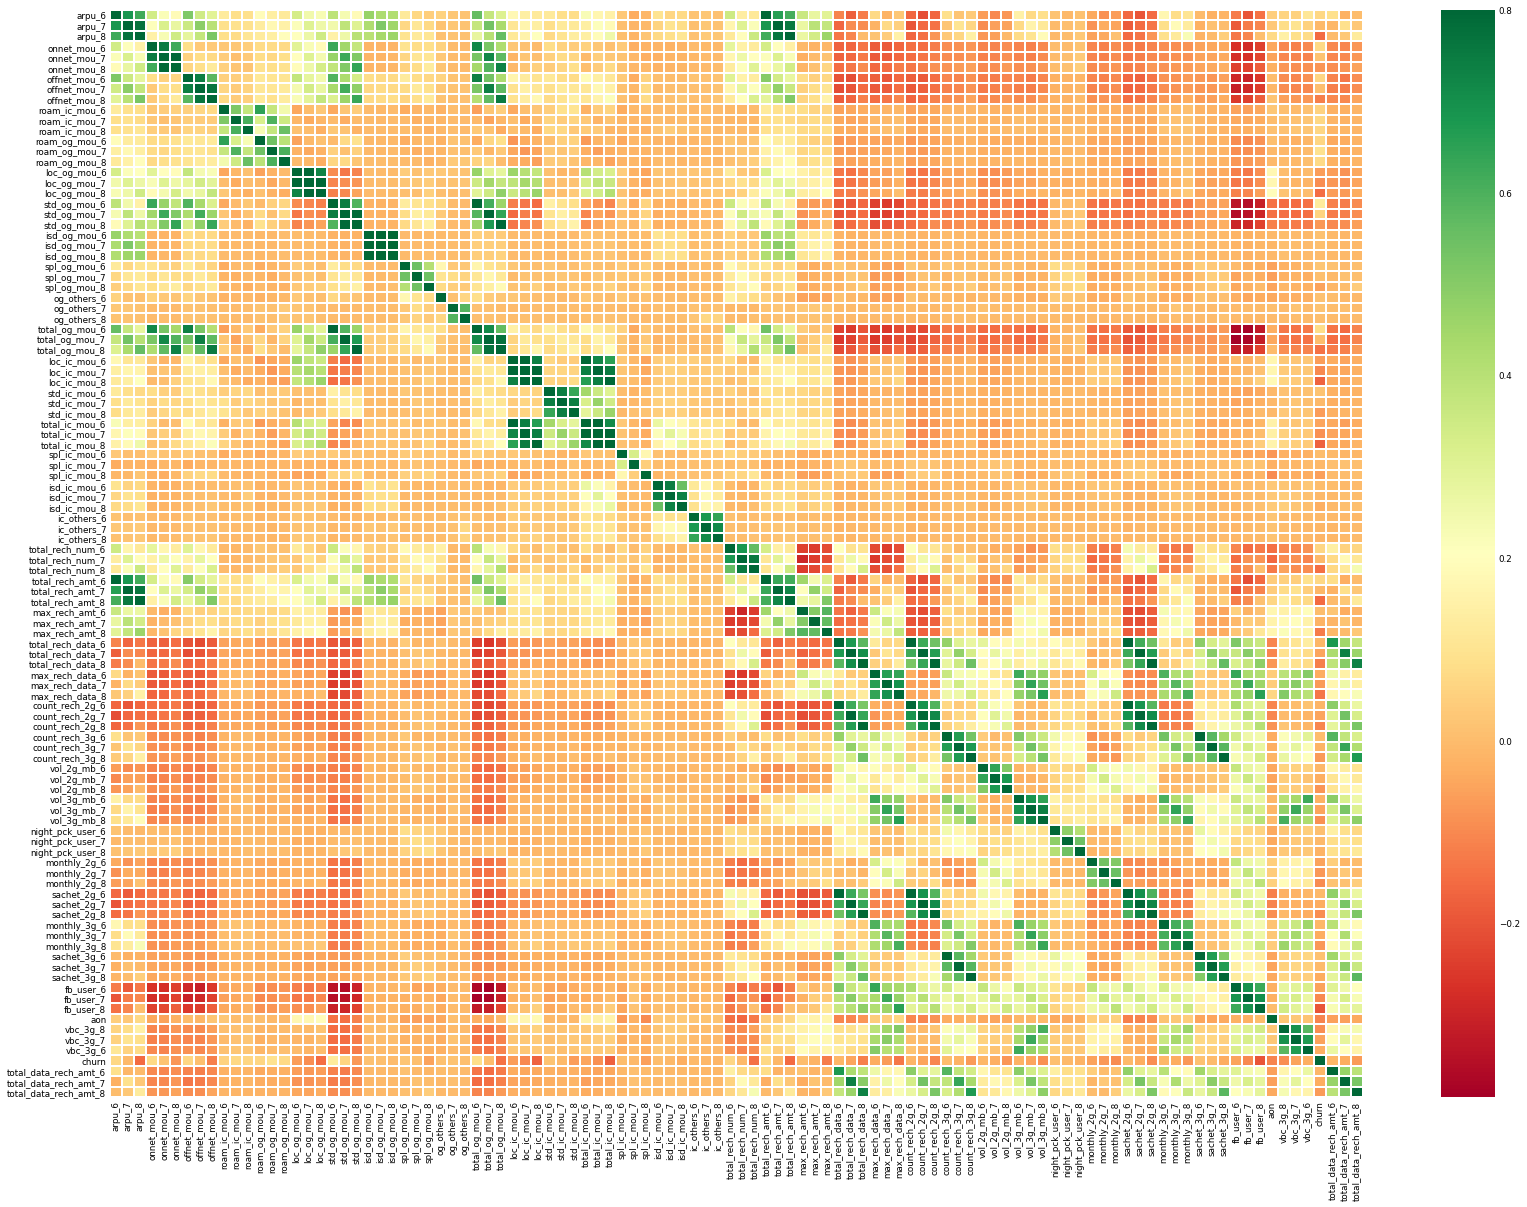

In [64]:
# Checking the correlation matrix
corrmat = tele_highval_cust.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrmat, vmax=.8,cmap="RdYlGn",linewidth =1)
plt.show()


In [65]:
# Checking the top correlated features
corr_matrix = tele_highval_cust.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


 # Data Preparation

## Outliers Treatment
Most of the columns have outliers. We will first check the skewness of the data and then perform box-cox transformation on the data to treat the outliers as much as possible.

In [66]:
#Find skewed numerical features
skew_features = tele_highval_cust[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.2 ".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 85 numerical features with Skew > 0.2 


og_others_7              111.136693
og_others_6              109.666418
og_others_8               99.486834
isd_og_mou_8              88.957842
isd_og_mou_6              87.011130
isd_og_mou_7              83.406637
spl_ic_mou_7              72.455557
ic_others_6               58.476965
ic_others_8               46.938700
ic_others_7               44.139529
spl_ic_mou_6              41.540185
isd_ic_mou_6              34.696418
isd_ic_mou_7              24.405269
total_data_rech_amt_6     22.639450
spl_og_mou_7              19.449973
total_data_rech_amt_8     19.062494
roam_ic_mou_8             18.590514
total_rech_amt_8          18.073139
arpu_7                    17.681620
isd_ic_mou_8              17.417915
roam_ic_mou_7             17.264460
total_rech_amt_7          16.200891
arpu_8                    15.417555
spl_og_mou_6              15.414604
roam_og_mou_8             14.479325
spl_og_mou_8              14.429340
std_ic_mou_7              13.514776
total_rech_amt_6          13

In [67]:
# We will use Boxcox transformation for numerical variables 

for i in skew_index:
    tele_highval_cust[i] = boxcox1p(tele_highval_cust[i], boxcox_normmax(tele_highval_cust[i] + 1))

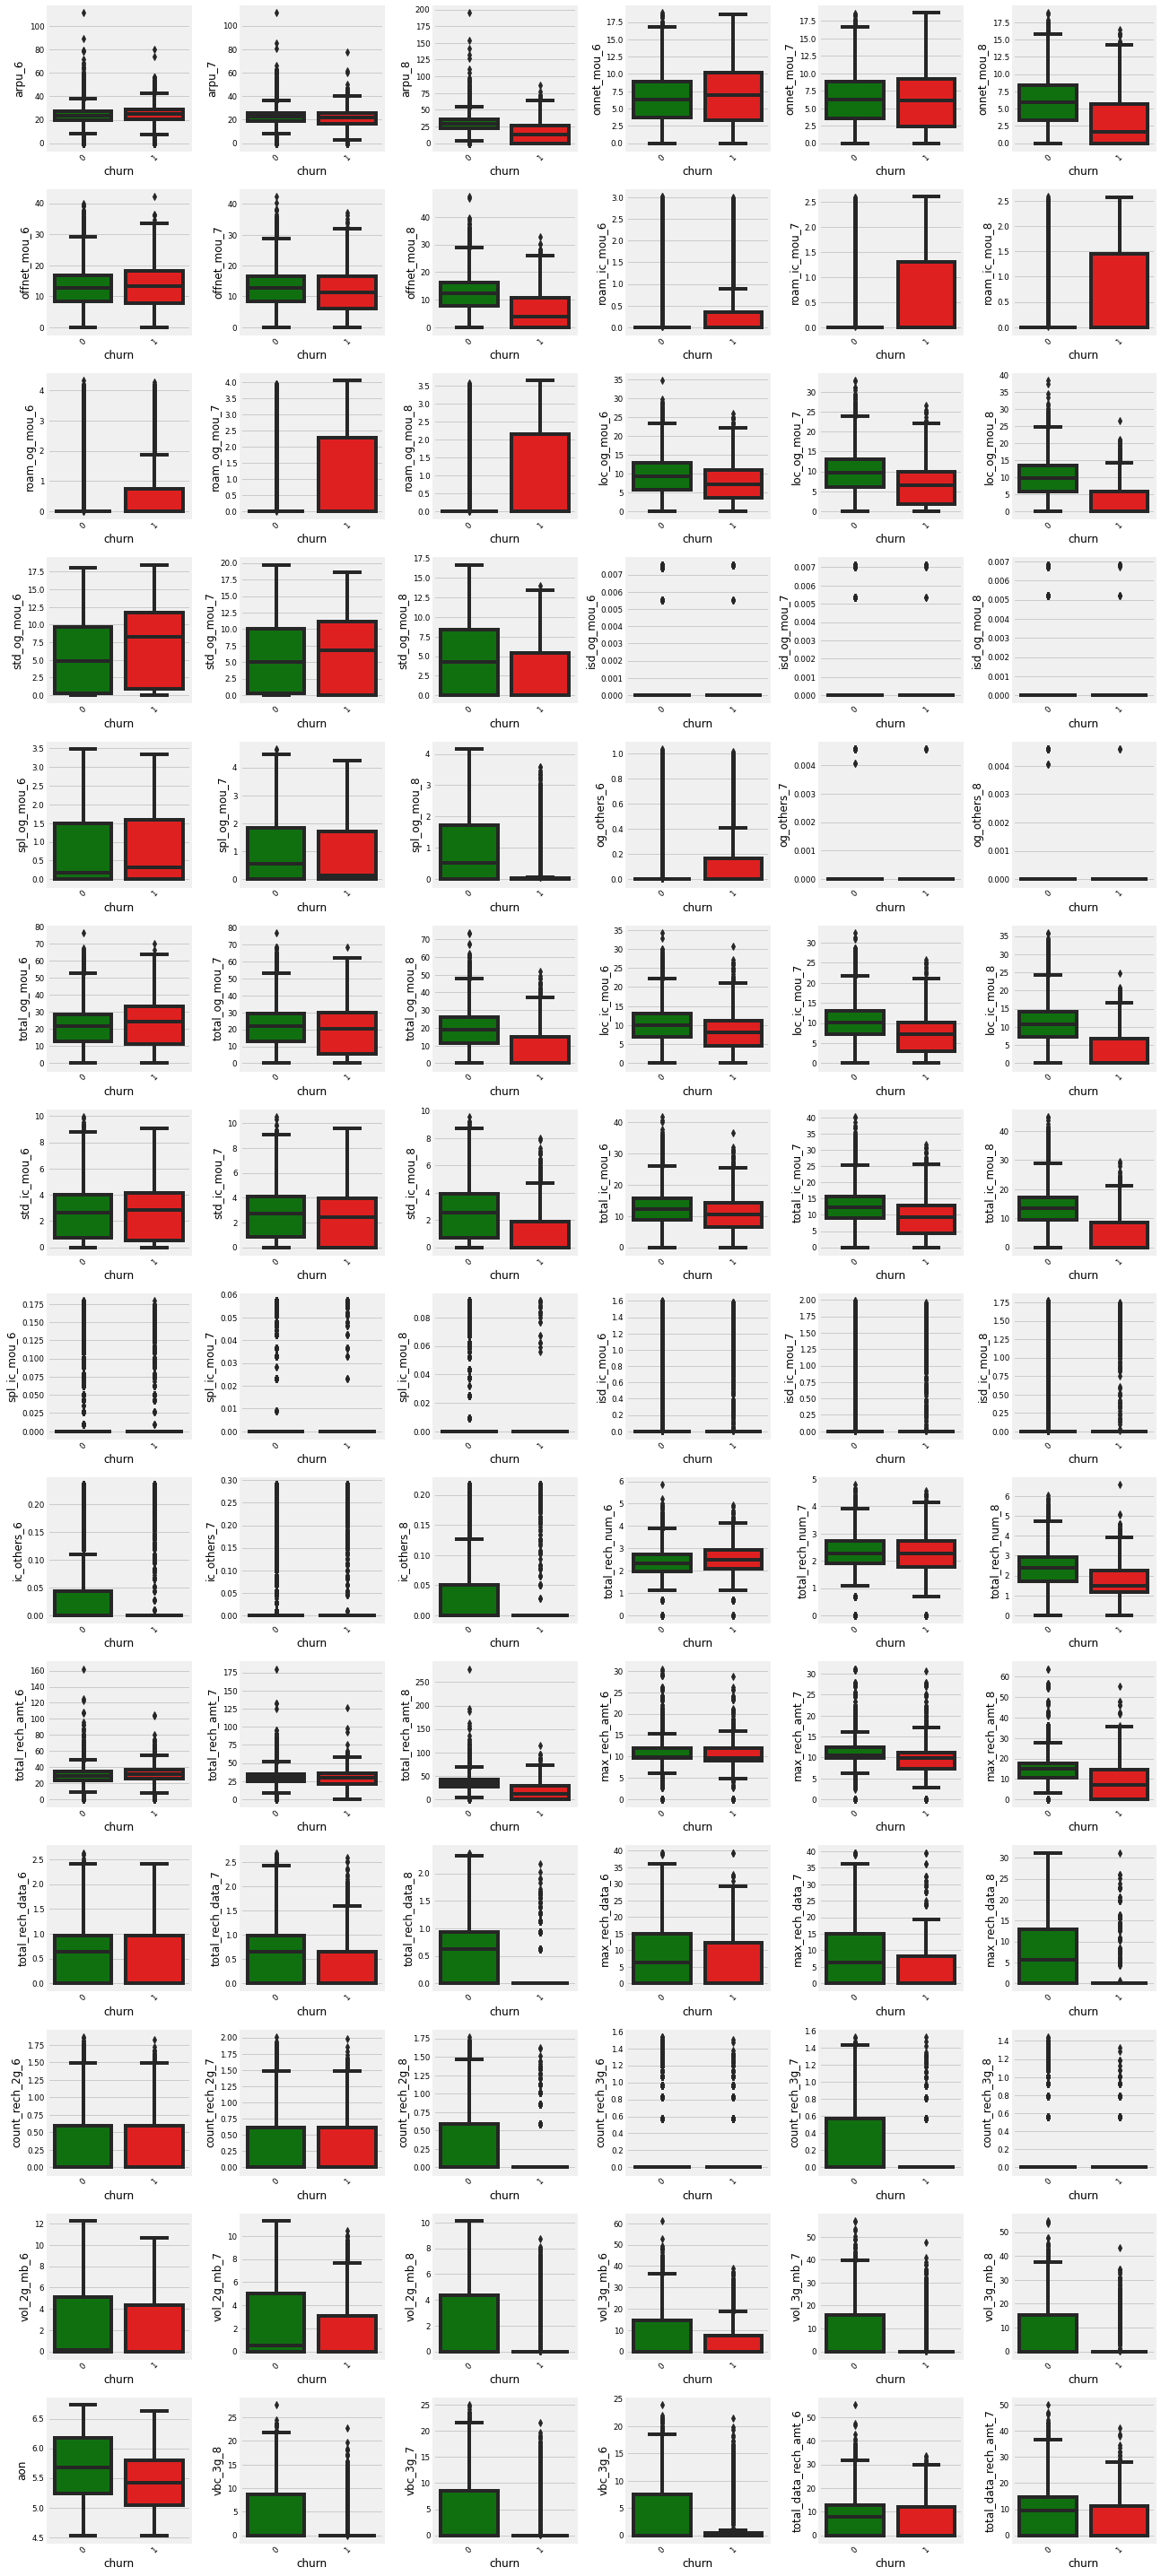

In [68]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

We have treated most of the numerical columns data for outlier now. Next Step is to conduct feature engineering.

## Feature engineering
Month 6 and 7th are good phase. We will use a average value of Month 6 and 7 to determine goodphase values. This will also reduce the number of features for model building.

In [69]:
tele_highval_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'churn', 'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object', length=104)

In [70]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [71]:
# Creating features for good phase and action phase column : 

cols = ["arpu","onnet_mou","offnet_mou","roam_ic_mou","roam_og_mou","loc_og_mou","std_og_mou",
        "isd_og_mou","spl_og_mou","og_others","total_og_mou","loc_ic_mou","std_ic_mou",
        "spl_ic_mou","isd_ic_mou","ic_others","total_ic_mou","total_rech_num","total_rech_amt",
        "max_rech_amt","total_rech_data","max_rech_data","count_rech_2g","count_rech_3g",
        "vol_2g_mb","vol_3g_mb","monthly_2g","sachet_2g","sachet_3g",
        "monthly_3g","vbc_3g","total_data_rech_amt"]

for col in cols : 
    tele_highval_cust = derive_good_action_phase(tele_highval_cust, col)
    print (col)

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_ic_mou
total_rech_num
total_rech_amt
max_rech_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
sachet_3g
monthly_3g
vbc_3g
total_data_rech_amt


In [72]:
#Checking the dataframe after conversion
tele_highval_cust.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,5.742221,1,16.081834,20.713068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.443393,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.521208,1.496747,1.148224,22.375679,24.730623,13.203148,19.370514,0.641770,0.626475,18.613791,15.774689,0.000000,0.000000,0.574579,0.561647,2.333617,1.942371,9.637338,9.394443,0.0,0,0.0,0,0.0,0,1.0,1,3.589683,4.931148,11.102779,9.786425
1,0,0,0,0,0,0,5.612021,1,32.670625,70.113926,5.555117,5.302856,16.895627,14.349753,1.951453,1.958364,2.245214,2.439742,14.349622,12.252005,5.829424,5.579032,0.003566,0.006833,0.706747,1.722190,0.0,0.0,24.123339,18.781594,14.011507,11.903424,5.692896,5.581259,0.058685,0.0,1.152614,1.535088,0.262379,0.216533,18.063520,17.923670,1.787956,2.261985,39.820231,87.601973,21.848750,41.992264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0,0.0,0,4.012347,6.244274,0.000000,0.000000
2,0,0,0,0,1,1,4.945874,0,21.795480,16.778963,9.568581,4.644254,8.971096,10.516334,0.000000,0.000000,0.000000,0.000000,12.773657,7.419760,7.176628,5.952949,0.000000,0.000000,0.000000,2.005312,0.0,0.0,22.699952,14.099010,6.561508,4.292310,2.558616,0.562976,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.697438,4.615602,3.031239,3.023032,28.318421,17.097227,10.075519,7.167743,0.489901,1.136426,7.527995,5.616541,0.447455,1.018574,0.000000,0.000000,3.414412,0.029567,9.390661,3.670657,0.5,0,0.5,3,0.0,0,0.0,0,10.873599,4.256728,6.256557,9.237323
3,0,0,0,0,0,0,5.536787,0,24.097628,34.307602,6.937999,6.164248,19.875305,20.768191,0.000000,0.000000,0.000000,0.000000,8.394549,9.688926,11.403356,10.130424,0.000000,0.000000,0.000000,0.000000,0.0,0.0,29.952810,28.845066,8.950543,11.201336,4.430578,4.871293,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.563293,14.914900,3.201233,3.817429,31.090396,40.969602,7.152169,9.237292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000,0.000000
4,0,0,0,0,1,1,5.413330,0,12.945044,26.644540,5.338160,4.574672,8.963148,12.210778,0.000000,0.000000,0.000000,0.000000,9.429600,10.913341,1.818925,4.553437,0.002682,0.000000,0.047143,2.338095,0

In [73]:
#Checking the new shape of the dataframe
tele_highval_cust.shape

(29591, 72)

## Train-Test split

In [74]:
# We will use sklearn train-test-split we will convert the main dataset to train and test dataset with 70% and 30% split

#Target variable
X = tele_highval_cust.drop('churn', axis = 1)
y = tele_highval_cust[['churn']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Checkiong the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (20713, 71)
 Shape of y_train is :  (20713, 1)
 Shape of X_test is  :  (8878, 71)
 Shape of y_test is  :  (8878, 1)


## Feature Scaling

In [75]:
# Storing the non binary column names as a list for performaing StandardScaler
feature_col =[]
data_col = tele_highval_cust.columns.to_list()

for col in data_col:
    if tele_highval_cust[col].nunique() > 2:
        feature_col.append(col)
        
feature_col

['aon',
 'arpu_good_phase',
 'arpu_action_phase',
 'onnet_mou_good_phase',
 'onnet_mou_action_phase',
 'offnet_mou_good_phase',
 'offnet_mou_action_phase',
 'roam_ic_mou_good_phase',
 'roam_ic_mou_action_phase',
 'roam_og_mou_good_phase',
 'roam_og_mou_action_phase',
 'loc_og_mou_good_phase',
 'loc_og_mou_action_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'isd_og_mou_good_phase',
 'isd_og_mou_action_phase',
 'spl_og_mou_good_phase',
 'spl_og_mou_action_phase',
 'og_others_good_phase',
 'og_others_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_good_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_good_phase',
 'std_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_good_phase',
 'isd_ic_mou_action_phase',
 'ic_others_good_phase',
 'ic_others_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'total_rech_num_good_phase',
 'total_rech_num_action_phase',
 'total_rech_amt_g

In [76]:
#Using StandardScaler for Scaling the X_train and X_test
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train[feature_col])

X_train[feature_col] = scaler.fit_transform(X_train[feature_col])
X_test[feature_col] = scaler.transform(X_test[feature_col])

# Checking the scaled dataframe
X_train.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
28117,0,0,0,1,1,1,-0.528861,-0.467471,-0.319068,-1.051506,-1.047610,-0.597360,-0.154047,-0.54328,-0.44171,-0.545471,-0.440755,-0.158734,0.156611,-1.208238,-1.102076,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.851481,-0.455758,1.240561,1.251130,0.695002,1.699288,-0.513234,-0.298957,-0.533818,-0.472588,1.257788,0.286440,1.160944,1.363811,-1.008128,-0.681013,-0.475504,0.096528,0.946217,0.810640,0.097638,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.410550,1.382603,1.002698,1.242866,1.292581,1.661691,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.183250,1.340651,1.250606,1.918476,2.159467,0.499513,0.591775
1574,0,0,0,1,1,1,0.233154,-0.818194,-0.430065,-1.347858,-1.281932,-0.214108,-0.501223,-0.54328,-0.44171,-0.545471,-0.440755,-0.050150,-0.711955,-1.099441,-0.056580,-0.337428,-0.259076,2.115867,1.540091,1.481465,-0.076965,-0.574379,-0.729649,0.049179,-0.381936,-0.972204,2.162939,1.887150,-0.298957,-0.533818,0.326037,-0.454012,2.202034,-0.185899,0.931746,0.318017,1.018777,-0.837504,-0.379617,-0.805709,-0.279132,0.751703,1.969936,0.278093,0.702630,1.110814,2.102973,-0.612612,1.382603,1.927404,1.858318,-0.732163,0.550974,-0.462916,-0.380187,0.562942,2.320598,-0.228656,0.749574,-0.395068,-0.343965,-0.695678,0.934885,0.346833,1.708898
22863,0,0,0,1,1,1,0.548641,-0.452190,-0.813731,-0.237607,-0.641922,-0.686547,-0.581803,-0.54328,-0.44171,-0.545471,-0.440755,-0.019972,-0.484903,-1.208238,-1.102076,-0.337428,-0.259076,1.237381,1.920525,-0.503468,-0.076965,-0.709895,-0.718901,0.224608,-0.369268,-1.430475,-1.245269,-0.513234,-0.298957,-0.533818,-0.472588,0.489277,-0.535004,-0.020551,-0.567019,0.809798,0.461813,-0.448269,-0.543246,-1.179273,-0.107703,1.260013,1.368754,-0.019088,-0.015079,1.213264,1.098465,1.410550,2.163059,0.213232,0.631840,1.036791,0.657528,-0.462916,-0.380187,0.770930,0.365338,0.816389,1.682398,-0.395068,-0.343965,0.956951,1.088836,0.666339,0.805608
8840,0,0,0,1,1,1,-1.843725,0.146634,-0.187263,1.042633,0.866636,-0.291516,0.025460,-0.54328,-0.44171,-0.545471,-0.440755,1.241791,1.060244,-0.721129,-0.250553,-0.337428,-0.259076,0.412287,-0.864140,-0.503468,-0.076965,0.367796,0.333271,1.289657,1.402730,0.857997,1.343514,-0.513234,-0.298957,1.234536,-0.472588,-0.627970,-0.535004,1.155576,1.355781,-0.468639,0.077432,0.088736,-0.305332,-0.043037,0.054252,0.097638,0.195002,1.102007,1.097937,0.470752,0.527444,-0.612612,-0.513008,0.

In [77]:
# Checking the scaled dataframe
X_test.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
3945,0,0,0,0,0,0,-0.126491,0.031503,0.198380,1.404110,1.512551,-0.850806,-0.266763,-0.543280,-0.441710,-0.545471,-0.440755,-0.976885,-1.008852,1.219854,1.393512,-0.337428,-0.259076,0.409806,-0.313011,-0.503468,-0.076965,0.669429,0.901960,-0.202180,-0.587967,-0.801104,-0.173399,0.607306,3.806894,-0.533818,-0.472588,1.038612,0.827454,-0.429694,-0.702240,0.960151,1.018777,-0.107656,0.284884,-1.179273,0.054252,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
18981,0,0,0,0,0,0,-0.766292,0.401345,1.028519,0.505724,1.320249,1.138970,1.734024,0.780640,-0.441710,1.001603,-0.440755,-0.213913,0.567866,1.170303,1.700215,-0.337428,-0.259076,0.373077,0.982632,-0.503468,-0.076965,0.889724,1.672906,-0.658355,-0.104345,0.398294,0.671549,-0.513234,-0.298957,1.084576,2.533083,-0.627970,2.211171,-0.604061,0.286324,0.182898,0.766101,0.421230,0.925941,-0.434280,0.158762,-1.070667,0.195002,-1.071646,-0.547319,-0.839221,0.527444,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.025714,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.598681
24100,0,0,0,0,0,0,0.807275,-1.233034,0.217727,0.152057,0.460959,0.132609,0.310991,1.408633,0.802457,1.958513,1.623131,-0.330329,0.023565,0.668732,0.845012,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.086910,0.205292,-0.293059,-0.233109,1.724038,1.460414,-0.513234,-0.298957,-0.533818,-0.472588,-0.627970,-0.535004,0.334238,0.186344,-2.570062,-0.959753,-1.156438,-1.117930,-0.583247,-0.204529,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
25300,0,0,0,1,1,1,0.671698,1.238497,1.044121,0.037504,0.316263,0.658094,0.794836,2.537277,2.386037,2.070175,1.449200,1.125470,1.274169,-1.061022,-0.616228,-0.337428,-0.259076,1.516538,-0.864140,-0.503468,-0.076965,0.269470,0.503288,2.650356,2.356318,0.555867,0.415598,-0.513234,1.399243,0.982196,1.519649,2.273134,2.207692,2.517667,2.190729,-0.584631,-0.449552,1.233224,0.925941,0.946217,0.810640,0.395985,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.847055

## Data imbalance Treatment

---
SMOTEENN = SMOTE + Edited NearestNeighbors

SMOTEENN is more aggressive at downsampling the majority class than Tomek Links, providing more in-depth cleaning. They apply the method, removing examples from both the majority and minority classes.



In [78]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote - SMOTEENN
sampling = SMOTEENN(random_state = 0)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train, y_train)
X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)
print (" Shape of the X_train after resampling : ",X_train_resampled.shape)
print (" Shape of the Y_train after resampling : ",y_train_resampled.shape)

 Shape of the X_train after resampling :  (34146, 71)
 Shape of the Y_train after resampling :  (34146, 1)


# Model Building

## Helper Methods

In [80]:
# Function to generate model evaluation metrics and graphs
def classification_algo_metrics(y_actual, y_pred):
    print("Classification report:\n", classification_report(y_actual,y_pred))
    
    accuracy = round(accuracy_score(y_actual, y_pred),4)
    precision = round(precision_score(y_actual, y_pred),4)
    recall = round(recall_score(y_actual, y_pred),4)
    f1 = round(f1_score(y_actual, y_pred),4)
    conf_matrix = confusion_matrix(y_actual, y_pred) # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred),4) # roc_auc_score
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", model_roc_auc,"\n")
     
    # Confusion Matrix
    cm = metrics.confusion_matrix( y_actual, y_pred, [0,1] )
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="PuBu",
    xticklabels = ["Not Churned", "Churned"] ,
    yticklabels = ["Not Churned", "Churned"] )
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()  
    return (accuracy, precision, recall, f1, model_roc_auc)

In [81]:
# create an Empty DataFrame to store results
results = pd.DataFrame()

In [82]:
# Storing the non binary column names as a list for performaing StandardScaler
feature_col =[]
data_col = tele_highval_cust.columns.to_list()

for col in data_col:
    if tele_highval_cust[col].nunique() > 2:
        feature_col.append(col)
        
feature_col

['aon',
 'arpu_good_phase',
 'arpu_action_phase',
 'onnet_mou_good_phase',
 'onnet_mou_action_phase',
 'offnet_mou_good_phase',
 'offnet_mou_action_phase',
 'roam_ic_mou_good_phase',
 'roam_ic_mou_action_phase',
 'roam_og_mou_good_phase',
 'roam_og_mou_action_phase',
 'loc_og_mou_good_phase',
 'loc_og_mou_action_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'isd_og_mou_good_phase',
 'isd_og_mou_action_phase',
 'spl_og_mou_good_phase',
 'spl_og_mou_action_phase',
 'og_others_good_phase',
 'og_others_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_good_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_good_phase',
 'std_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_good_phase',
 'isd_ic_mou_action_phase',
 'ic_others_good_phase',
 'ic_others_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'total_rech_num_good_phase',
 'total_rech_num_action_phase',
 'total_rech_amt_g

In [83]:
#Using StandardScaler for Scaling the X_train and X_test
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train[feature_col])

X_train[feature_col] = scaler.fit_transform(X_train[feature_col])
X_test[feature_col] = scaler.transform(X_test[feature_col])

# Checking the scaled dataframe
X_train.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
28117,0,0,0,1,1,1,-0.528861,-0.467471,-0.319068,-1.051506,-1.047610,-0.597360,-0.154047,-0.54328,-0.44171,-0.545471,-0.440755,-0.158734,0.156611,-1.208238,-1.102076,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.851481,-0.455758,1.240561,1.251130,0.695002,1.699288,-0.513234,-0.298957,-0.533818,-0.472588,1.257788,0.286440,1.160944,1.363811,-1.008128,-0.681013,-0.475504,0.096528,0.946217,0.810640,0.097638,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.410550,1.382603,1.002698,1.242866,1.292581,1.661691,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.183250,1.340651,1.250606,1.918476,2.159467,0.499513,0.591775
1574,0,0,0,1,1,1,0.233154,-0.818194,-0.430065,-1.347858,-1.281932,-0.214108,-0.501223,-0.54328,-0.44171,-0.545471,-0.440755,-0.050150,-0.711955,-1.099441,-0.056580,-0.337428,-0.259076,2.115867,1.540091,1.481465,-0.076965,-0.574379,-0.729649,0.049179,-0.381936,-0.972204,2.162939,1.887150,-0.298957,-0.533818,0.326037,-0.454012,2.202034,-0.185899,0.931746,0.318017,1.018777,-0.837504,-0.379617,-0.805709,-0.279132,0.751703,1.969936,0.278093,0.702630,1.110814,2.102973,-0.612612,1.382603,1.927404,1.858318,-0.732163,0.550974,-0.462916,-0.380187,0.562942,2.320598,-0.228656,0.749574,-0.395068,-0.343965,-0.695678,0.934885,0.346833,1.708898
22863,0,0,0,1,1,1,0.548641,-0.452190,-0.813731,-0.237607,-0.641922,-0.686547,-0.581803,-0.54328,-0.44171,-0.545471,-0.440755,-0.019972,-0.484903,-1.208238,-1.102076,-0.337428,-0.259076,1.237381,1.920525,-0.503468,-0.076965,-0.709895,-0.718901,0.224608,-0.369268,-1.430475,-1.245269,-0.513234,-0.298957,-0.533818,-0.472588,0.489277,-0.535004,-0.020551,-0.567019,0.809798,0.461813,-0.448269,-0.543246,-1.179273,-0.107703,1.260013,1.368754,-0.019088,-0.015079,1.213264,1.098465,1.410550,2.163059,0.213232,0.631840,1.036791,0.657528,-0.462916,-0.380187,0.770930,0.365338,0.816389,1.682398,-0.395068,-0.343965,0.956951,1.088836,0.666339,0.805608
8840,0,0,0,1,1,1,-1.843725,0.146634,-0.187263,1.042633,0.866636,-0.291516,0.025460,-0.54328,-0.44171,-0.545471,-0.440755,1.241791,1.060244,-0.721129,-0.250553,-0.337428,-0.259076,0.412287,-0.864140,-0.503468,-0.076965,0.367796,0.333271,1.289657,1.402730,0.857997,1.343514,-0.513234,-0.298957,1.234536,-0.472588,-0.627970,-0.535004,1.155576,1.355781,-0.468639,0.077432,0.088736,-0.305332,-0.043037,0.054252,0.097638,0.195002,1.102007,1.097937,0.470752,0.527444,-0.612612,-0.513008,0.

In [84]:
# Checking the scaled dataframe
X_test.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
3945,0,0,0,0,0,0,-0.126491,0.031503,0.198380,1.404110,1.512551,-0.850806,-0.266763,-0.543280,-0.441710,-0.545471,-0.440755,-0.976885,-1.008852,1.219854,1.393512,-0.337428,-0.259076,0.409806,-0.313011,-0.503468,-0.076965,0.669429,0.901960,-0.202180,-0.587967,-0.801104,-0.173399,0.607306,3.806894,-0.533818,-0.472588,1.038612,0.827454,-0.429694,-0.702240,0.960151,1.018777,-0.107656,0.284884,-1.179273,0.054252,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
18981,0,0,0,0,0,0,-0.766292,0.401345,1.028519,0.505724,1.320249,1.138970,1.734024,0.780640,-0.441710,1.001603,-0.440755,-0.213913,0.567866,1.170303,1.700215,-0.337428,-0.259076,0.373077,0.982632,-0.503468,-0.076965,0.889724,1.672906,-0.658355,-0.104345,0.398294,0.671549,-0.513234,-0.298957,1.084576,2.533083,-0.627970,2.211171,-0.604061,0.286324,0.182898,0.766101,0.421230,0.925941,-0.434280,0.158762,-1.070667,0.195002,-1.071646,-0.547319,-0.839221,0.527444,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.025714,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.598681
24100,0,0,0,0,0,0,0.807275,-1.233034,0.217727,0.152057,0.460959,0.132609,0.310991,1.408633,0.802457,1.958513,1.623131,-0.330329,0.023565,0.668732,0.845012,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.086910,0.205292,-0.293059,-0.233109,1.724038,1.460414,-0.513234,-0.298957,-0.533818,-0.472588,-0.627970,-0.535004,0.334238,0.186344,-2.570062,-0.959753,-1.156438,-1.117930,-0.583247,-0.204529,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
25300,0,0,0,1,1,1,0.671698,1.238497,1.044121,0.037504,0.316263,0.658094,0.794836,2.537277,2.386037,2.070175,1.449200,1.125470,1.274169,-1.061022,-0.616228,-0.337428,-0.259076,1.516538,-0.864140,-0.503468,-0.076965,0.269470,0.503288,2.650356,2.356318,0.555867,0.415598,-0.513234,1.399243,0.982196,1.519649,2.273134,2.207692,2.517667,2.190729,-0.584631,-0.449552,1.233224,0.925941,0.946217,0.810640,0.395985,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.847055

## PCA


In [85]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (10,6))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [86]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print("Shape of X train PCA : ", X_train_pca.shape)
    print("Shape of Y train PCA : ", y_train.shape)
    print("Shape of X test PCA : ", X_test_pca.shape)
    print("Shape of Y test PCA : ", y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (10,8))
    sns.heatmap(corrmat, annot = False,cmap="RdYlGn",linewidth =1)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    
    return X_train_pca, X_test_pca

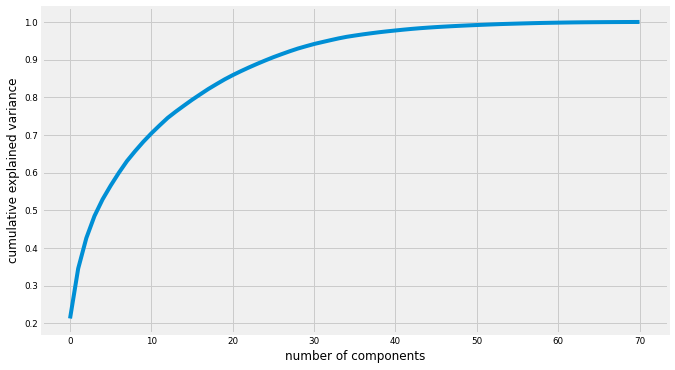

In [87]:
perform_PCA(X_train)

## Logistic Regression with PCA and handling imbalance using SMOTEEN technique

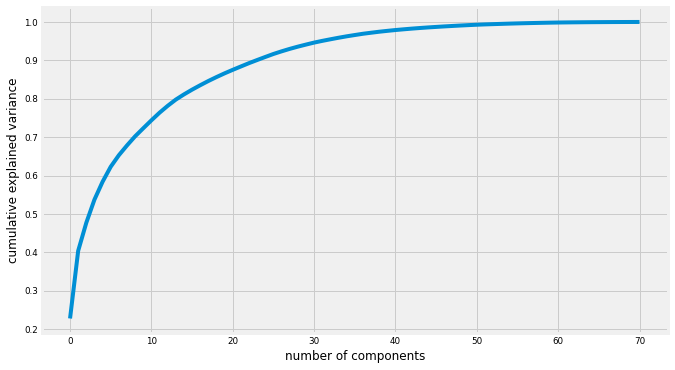

In [88]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_train_resampled)

Shape of X train PCA :  (34146, 30)
Shape of Y train PCA :  (34146, 1)
Shape of X test PCA :  (8878, 30)
Shape of Y test PCA :  (8878, 1)


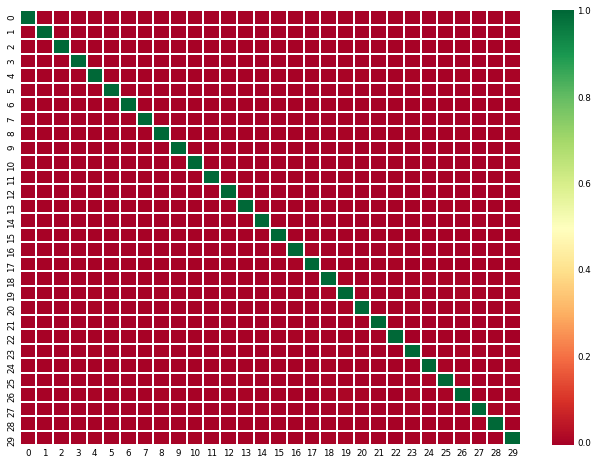

max corr: 0.007593343926526882 , min corr:  -0.006781732748627381


In [89]:
# Step 1.2 : Create 30 Principal components
X_train_pca_smoteen, X_test_pca_smoteen = perform_incremental_PCA(X_train_resampled, y_train_resampled, 30)

In [90]:
# Step 2: Build the logistic model using PCA Components
lr = LogisticRegression()
model = lr.fit(X_train_pca_smoteen,y_train_resampled)

In [91]:
# Step 3: Make predictions on the training data
y_train_pred = model.predict(X_train_pca_smoteen)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87     15103
           1       0.90      0.88      0.89     19043

    accuracy                           0.88     34146
   macro avg       0.88      0.88      0.88     34146
weighted avg       0.88      0.88      0.88     34146

Accuracy Score   :  0.8828
Precision Score  :  0.9032
Recall Score     :  0.8846
F1 Score         :  0.8938
Area under curve :  0.8825 



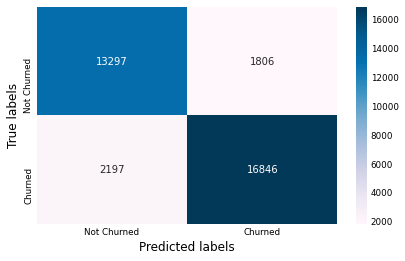

(0.8828, 0.9032, 0.8846, 0.8938, 0.8825)

In [92]:
# Step 4: Check model performance on training data
classification_algo_metrics(y_train_resampled, y_train_pred)

In [93]:
# Step 5: Make predictions on the testing data
y_test_pred = model.predict(X_test_pca_smoteen)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      8182
           1       0.27      0.87      0.41       696

    accuracy                           0.80      8878
   macro avg       0.63      0.83      0.64      8878
weighted avg       0.93      0.80      0.84      8878

Accuracy Score   :  0.8021
Precision Score  :  0.2662
Recall Score     :  0.8678
F1 Score         :  0.4074
Area under curve :  0.8322 



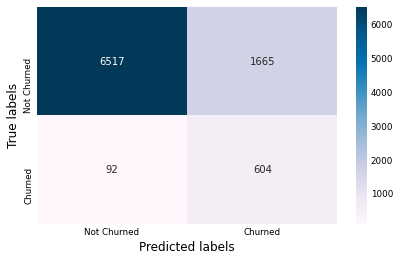

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression with PCA and SMOTEEN,0.8021,0.2662,0.8678,0.4074,0.8322


In [94]:
# Step 6: Check model performance on testing data
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_pred)

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA and SMOTEEN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

## Random Forest

Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample. Both bagging and random forests have proven effective on a wide range of different predictive modeling problems.Although effective, they are not suited to classification problems with a skewed class distribution. We will use resampled data using SMOTEENN technique.

In [106]:
# Let's build the model using the hyperparameters we got from GridSearchCV
model_rf = RandomForestClassifier(random_state = 100, n_jobs =-1,
                                  n_estimators= 500,
                                  max_depth = 30,
                                  max_features = 'auto',
                                  min_samples_leaf = 100,
                                  min_samples_split=200,
                                  criterion ='gini')
model_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     15103
           1       0.95      0.91      0.93     19043

    accuracy                           0.92     34146
   macro avg       0.92      0.93      0.92     34146
weighted avg       0.93      0.92      0.92     34146

Accuracy Score   :  0.9248
Precision Score  :  0.954
Recall Score     :  0.909
F1 Score         :  0.9309
Area under curve :  0.9269 



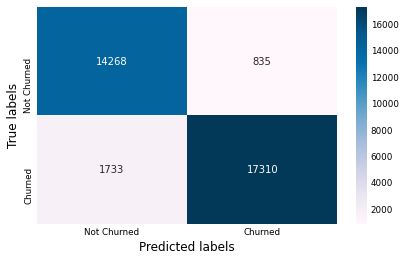

(0.9248, 0.954, 0.909, 0.9309, 0.9269)

In [107]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train_resampled)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train_resampled,y_train_rf)

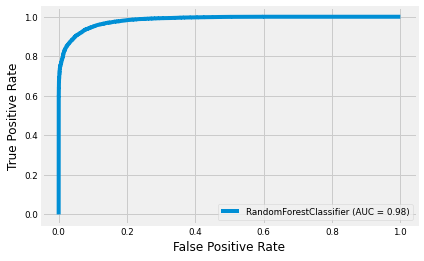

In [109]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.82      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.84      0.70      8878
weighted avg       0.93      0.86      0.89      8878

Accuracy Score   :  0.861
Precision Score  :  0.3399
Recall Score     :  0.8204
F1 Score         :  0.4806
Area under curve :  0.8424 



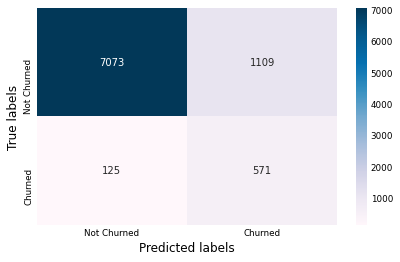

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression with PCA and SMOTEEN,0.8021,0.2662,0.8678,0.4074,0.8322
1,Random Forest with PCA and SMOTEEN,0.9027,0.4242,0.6753,0.5211,0.7987
0,Random Forest with SMOTEEN,0.8610,0.3399,0.8204,0.4806,0.8424


In [110]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with SMOTEEN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

## Final Model Selection

As our target is to reduce high value customer churn, it is necessary that we reduce the False Negative and not worry about False Positive. To reduce False Negative we will choose the model which provides highest Recall value. As we are not targeting to reduce False Positives, i.e. customers who are identified as potential churn but will not actually churn, then we will not focus on Precision and F1 Score.

In [99]:
# Rearranging the dataframe 
results = results.sort_values("Recall", ascending = False).reset_index(drop=True)
results

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression with PCA and SMOTEEN,0.8021,0.2662,0.8678,0.4074,0.8322
1,Random Forest with PCA and SMOTEEN,0.9027,0.4242,0.6753,0.5211,0.7987


- The Logistic Regression with PCA & SMOTEEN model gave best results.
- As logistic regression model can be interpreted we will use Random Forest for identifying the important featurea

# Feature importance


In [111]:
# feature_importance
importance = model_rf.feature_importances_
importance

array([0.00000000e+00, 6.95281406e-06, 3.14534565e-06, 2.36685167e-03,
       3.34649265e-03, 2.72275005e-02, 5.80707344e-03, 3.03598452e-03,
       4.70604630e-02, 1.81612842e-03, 1.20822793e-02, 2.10540216e-03,
       2.04733068e-02, 3.55624344e-03, 6.42917418e-02, 3.34149794e-03,
       6.69562091e-02, 6.04312109e-03, 7.98932146e-02, 4.30033058e-03,
       8.55588530e-03, 1.08230138e-03, 4.66766012e-04, 1.99679806e-03,
       5.59248187e-03, 9.53114751e-04, 0.00000000e+00, 3.12800224e-03,
       5.10918233e-02, 8.82272515e-03, 1.22845210e-01, 1.21681006e-03,
       1.52931010e-02, 1.93005389e-03, 1.87102415e-03, 1.11522492e-03,
       4.98918490e-04, 6.57646623e-04, 2.53496826e-03, 6.89768089e-03,
       1.09293140e-01, 2.01513841e-03, 1.53356353e-02, 3.29316373e-03,
       6.26523680e-02, 1.77909146e-03, 3.13485206e-02, 2.55440148e-03,
       3.45299030e-02, 3.78280421e-03, 3.34992949e-02, 3.32331543e-03,
       1.08968208e-02, 2.59623870e-03, 1.74366654e-03, 2.29214112e-03,
      

In [122]:
# predictors
features = X_train.columns

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]


# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_mou_action_phase,12.284521
1,total_ic_mou_action_phase,10.929314
2,loc_og_mou_action_phase,7.989321
3,roam_og_mou_action_phase,6.695621
4,roam_ic_mou_action_phase,6.429174
5,total_rech_amt_action_phase,6.265237
6,total_og_mou_action_phase,5.109182
7,arpu_action_phase,4.706046
8,total_rech_data_action_phase,3.452990
9,max_rech_data_action_phase,3.349929


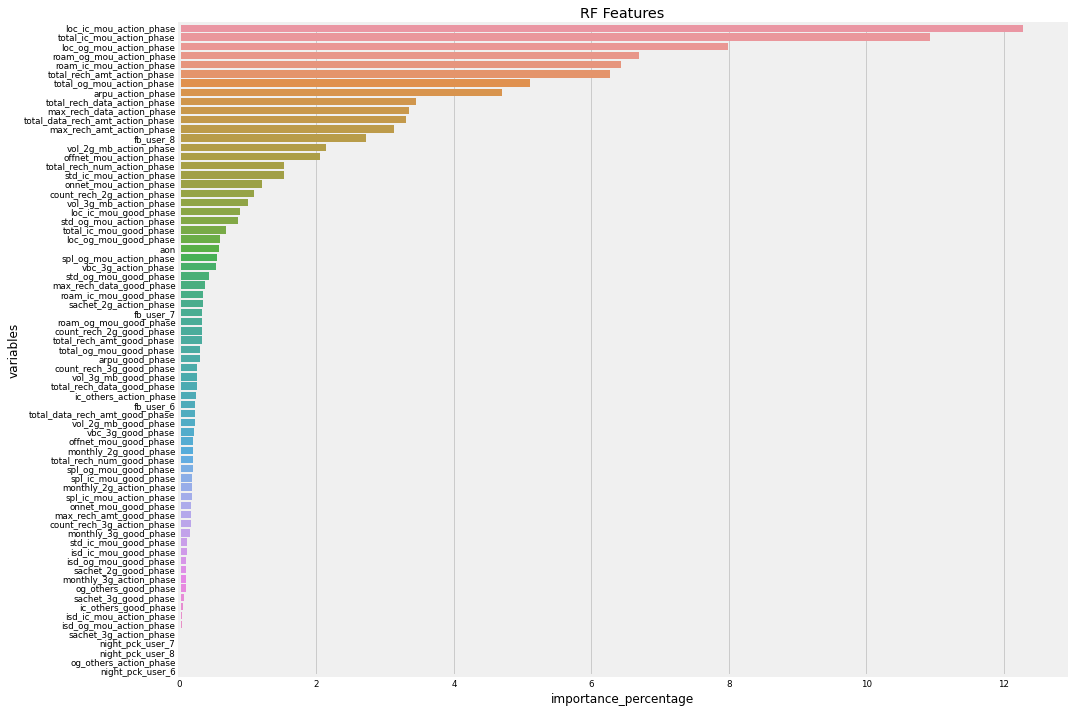

In [125]:
plt.figure(figsize=(15, 10))
sns.barplot(x="importance_percentage", y="variables", data=feature_importance.sort_values(by="importance_percentage", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [126]:
# Top 20 features : 
feature_imp=feature_importance.sort_values("importance_percentage",ascending = False)
feature_imp.head(20)

,variables,importance_percentage
0,loc_ic_mou_action_phase,12.284521
1,total_ic_mou_action_phase,10.929314
2,loc_og_mou_action_phase,7.989321
3,roam_og_mou_action_phase,6.695621
4,roam_ic_mou_action_phase,6.429174
5,total_rech_amt_action_phase,6.265237
6,total_og_mou_action_phase,5.109182
7,arpu_action_phase,4.706046
8,total_rech_data_action_phase,3.452990
9,max_rech_data_action_phase,3.349929


From the above plots we can see that top 10 importance features are based on action phase. Top impacting features are loc_ic_mou_action_phase	, total_ic_mou_action_phase, loc_og_mou_action_phase,roam_og_mou_action_phase etc for the action phase or month 8.

# Business Recommendations


- Incoming Calls : Total incoming minutes, local & std incoming minutes are in top 10 features. It shows that more incoming calls have high impact on retaining the customer. Incoming calls (local & std) should be made free for all customer
- Total Recharge Number : Total Recharge Number (total_rech_num) is 4th highest coefficient. It shows that customers with high frequency of recharge numbers tends to stay. The company should launch small value top-up option for calls. Many times customer may hesitate to top up (prepaid option) with higher value amount. For these customer retention, small value top-up will be ideal. The similar logic is applicable for Total Recharge Number for data (total_rech_data) which has the 6th largest coefficient. Similar small top-up values for data might be useful. Also a combination of calling & data which is cost efficient might attract customers to stay with the telecom company
- Outgoing Calls : Local, STD and Total outgoing call minutes are among the top 20 feature. It shows that higher the outgoing calls, the better chances of the customer to stay with the telecom company. To ensure that, telecom company should launch various discounted offer on outgoing calls. Lower price/minute or free outgoing calls to same telecom company provided connections will also benefit in retaining customer group.
- Roaming : Incoming and Outgoing calls during roaming are critical factor as these are part of top 20 coefficients. Incoming call roaming charges should be made free within the country. STD outgoing call should be same and shouldn't attract extra cost if the roaming option is within the country. For outside country incoming and outgoing roaming as well as data connection, company should launch special country wise roaming packages valid for 7 days, 15 days, 1 month etc. These benefits will attract customer to stay with the telecom company for longer periof
- Total Amount Recharge : Total Amount Recharge on calls and data also have high coefficent value. Telecom company should launch discounted price for higher /longer terms (days/month etc) recharge options on calls and data. This may ensure that the customer is ready to available long terms plans which also indicates that the customer may tend to stay longer.
- *Introduce* more services to the existing customer or informing them and generating more average revenue would lessen their chances to churn out.